#Description

##Context
The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.



##Objective
Trade&Ahead is a financial consultancy firm that provides its customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.



##Data Description
The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

## Data Dictionary
- **Ticker Symbol**: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a specific stock market.  
- **Company**: Name of the company.  
- **GICS Sector**: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations.  
- **GICS Sub Industry**: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations.  
- **Current Price**: Current stock price in dollars.  
- **Price Change**: Percentage change in the stock price in 13 weeks.  
- **Volatility**: Standard deviation of the stock price over the past 13 weeks.  
- **ROE (Return on Equity)**: A measure of financial performance calculated by dividing net income by shareholders' equity (assets minus debt).  
- **Cash Ratio**: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities.  
- **Net Cash Flow**: The difference between a company's cash inflows and outflows (in dollars).  
- **Net Income**: Revenues minus expenses, interest, and taxes (in dollars).  
- **Earnings Per Share (EPS)**: Company's net profit divided by the number of common shares it has outstanding (in dollars).  
- **Estimated Shares Outstanding**: The company's stock currently held by all its shareholders.  
- **P/E Ratio (Price-to-Earnings Ratio)**: Ratio of the company's current stock price to the earnings per share.  
- **P/B Ratio (Price-to-Book Ratio)**: Ratio of the company's stock price per share to its book value per share (book value = total assets - total liabilities).

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/My Drive/python intro/TrainAhead/stock_data.csv")
df=data.copy()

Mounted at /content/drive


##Data Overview

In [3]:
# print first five rows
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [4]:
# print last five rows
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


**Observations:**  
* The dataset provides financial and stock-related data for various companies across different sectors, such as **Industrials**, **Health Care**, and **Information Technology**, with attributes like **current price, price change, volatility, and earnings per share**.  
* Key financial indicators such as **ROE, cash ratio, net income, and P/E ratio** are included to analyze company performance and make informed investment decisions.

In [5]:
# Inspecting the Dataset Dimensions
df.shape

(340, 15)

**Observations:**
* There are 340 rows and 15 colums in the dataframe.

In [6]:
df.info()  #Examining Data Types of Columns in the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations:**

1. The dataset consists of 340 entries with 15 columns, containing a mix of data types including `float64`, `int64`, and `object` (categorical).
2. All columns have non-null values, indicating that there are no missing data points.
3. The dataset contains financial and stock-related information with numerical attributes (e.g., `Current Price`, `Volatility`, `ROE`) and categorical ones (e.g., `Ticker Symbol`, `GICS Sector`, `Security`).

In [7]:
df.duplicated().sum()

0


**Observations:**
There are no duplicate values in the data.

In [8]:
df.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0



**Observations:**
There are no missing values in the data.

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


**Observations:**

1. The dataset contains both categorical and numerical columns, with `GICS Sector` having 11 unique values and `GICS Sub Industry` having 104 unique values.
2. Financial metrics such as `Current Price`, `Price Change`, and `Volatility` have varied ranges, with `Current Price` having a mean of 80.86 and `Price Change` ranging from -47.13% to 55.05%.
3. The financial performance indicators like `ROE`, `Cash Ratio`, and `Net Income` show significant variability, with extreme values such as a `ROE` ranging from 1 to 917 and `Net Income` spanning from negative to positive billions.

##Exploratory Data Analysis (EDA)

###Univariate Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_column(data, column_name):
    """
    Function to plot a column based on its data type.

    Parameters:
    - data: DataFrame containing the column
    - column_name: Name of the column to plot

    Plots:
    - Categorical columns: Countplot
    - Numerical columns: Histogram and Boxplot
    """
    plt.figure(figsize=(12,8))

    # Check if the column is categorical
    if data[column_name].dtype in ['object', 'category']:
        # Plot for categorical data
        plt.title(f"Countplot for {column_name}")
        sns.countplot(x=data[column_name])
        plt.xticks(rotation=45)
        plt.show()

    # Check if the column is numerical
    elif data[column_name].dtype in ['float64', 'int64']:
        # Plot for numerical data
        plt.subplot(1, 2, 1)
        sns.histplot(data[column_name], kde=True)
        plt.title(f"Histogram for {column_name}")

        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column_name])
        plt.title(f"Boxplot for {column_name}")

        plt.tight_layout()
        plt.show()


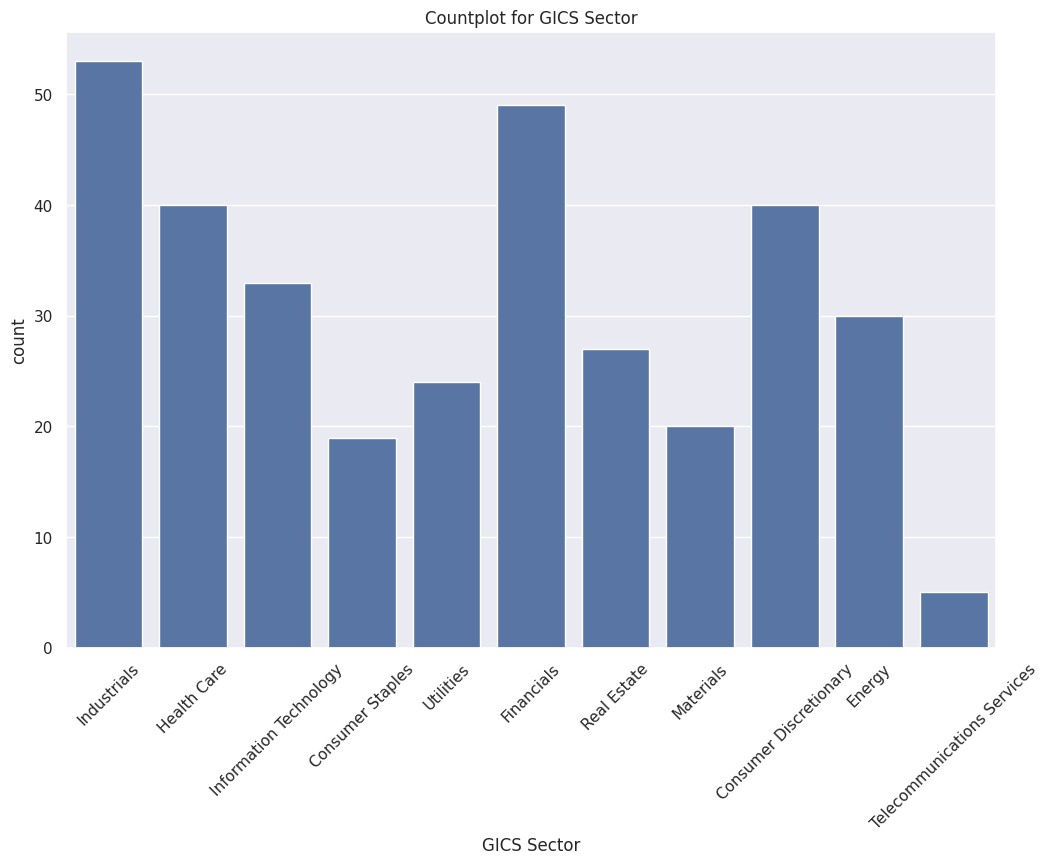

In [11]:
plot_column(df, 'GICS Sector')

**Observations:**
- **Uneven Distribution**: The data is not evenly distributed across the GICS sectors. Some sectors, like Industrials, have a significantly higher number of observations compared to others, such as Telecommunication Services.

- **Dominant Sectors**: Industrials, Health Care, and Financials appear to be the most dominant sectors in terms of the number of observations.

- **Underrepresented Sectors**: Telecommunication Services has the lowest number of observations, indicating it might be underrepresented in the dataset.

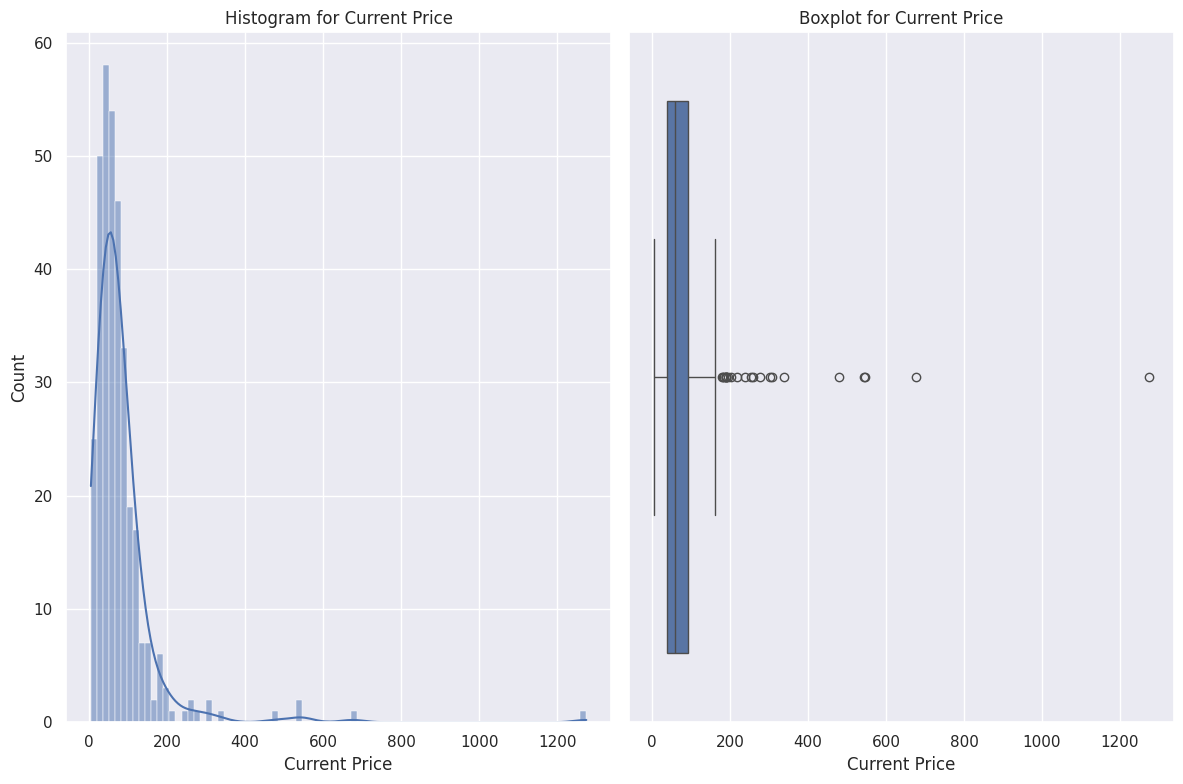

In [12]:
plot_column(df, 'Current Price')

**Observations:**
- **Right Skewness**: The histogram clearly shows a right-skewed distribution. This indicates that a majority of the data points are concentrated towards the lower end of the price range, with a few high-priced items extending the tail towards the right.

- **Presence of Outliers**: The boxplot confirms the presence of outliers. The right whisker extends significantly, indicating the existence of some very high-priced items that are considerably higher than the majority of the data.

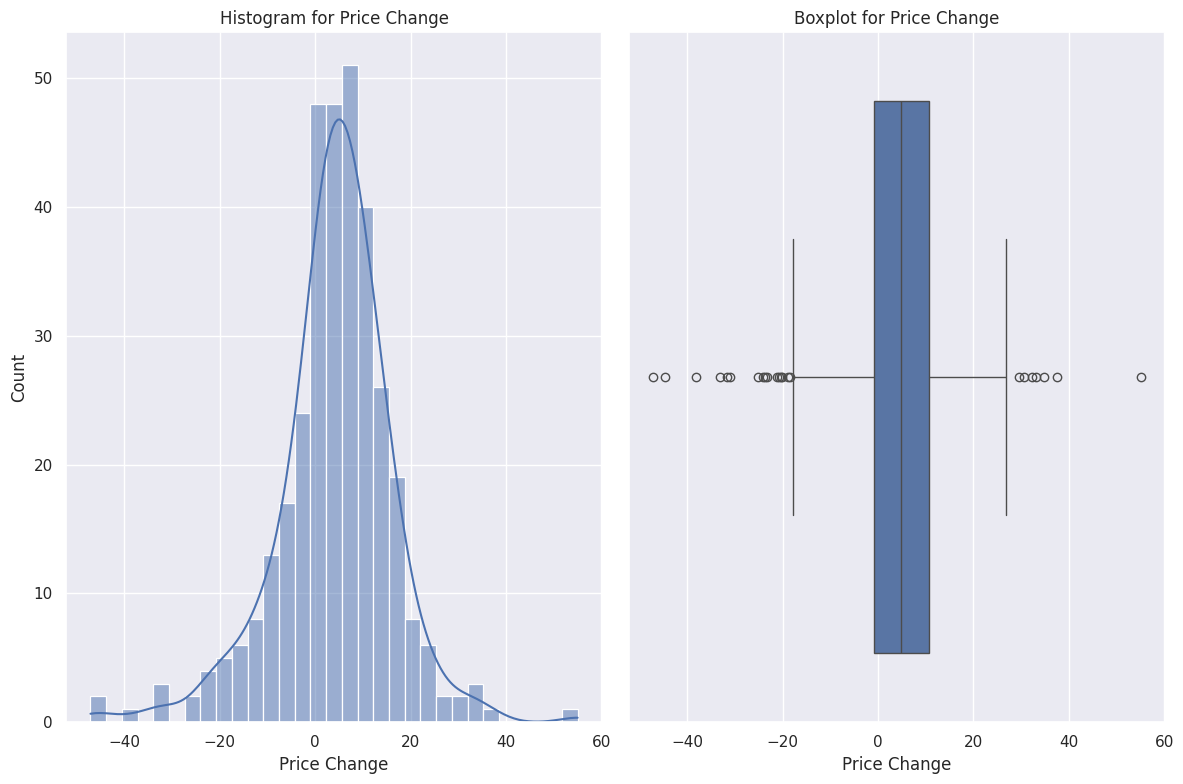

In [13]:
plot_column(df, 'Price Change')

**Observations:**

 **Distribution of Price Change**: The histogram shows a nearly symmetric, bell-shaped distribution of price changes, indicating that most price changes are centered around zero with a few extreme values on both sides. This suggests a normal distribution with minimal skewness.  

 **Presence of Outliers**: The boxplot reveals several outliers on both the positive and negative ends, indicating that while most price changes are within a typical range, there are some stocks with significantly larger price fluctuations.

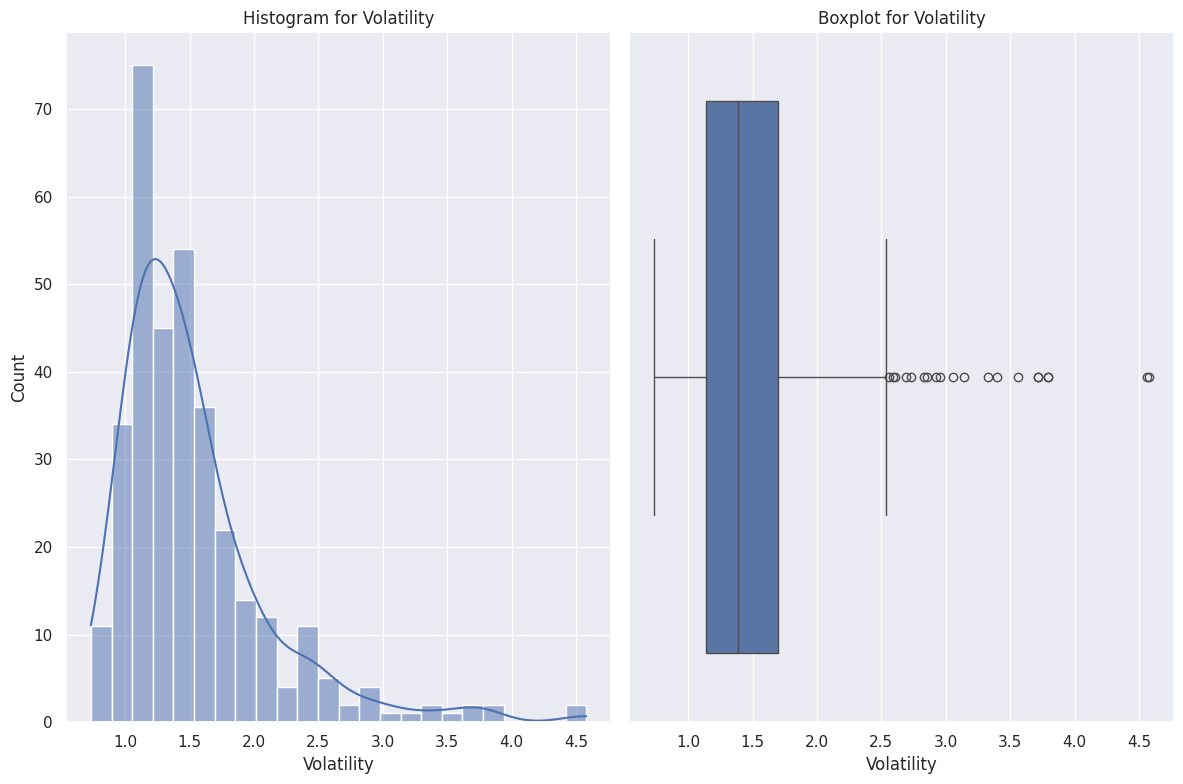

In [14]:
plot_column(df, 'Volatility')

**Observations:**
**Right Skewness**: The histogram clearly shows a right-skewed distribution. This indicates that a majority of the data points are concentrated towards the lower end of the volatility range, with a few high-volatility observations extending the tail towards the right.

**Presence of Outliers**: The boxplot confirms the presence of outliers. The right whisker extends significantly, indicating the existence of some data points with exceptionally high volatility compared to the majority of the data.

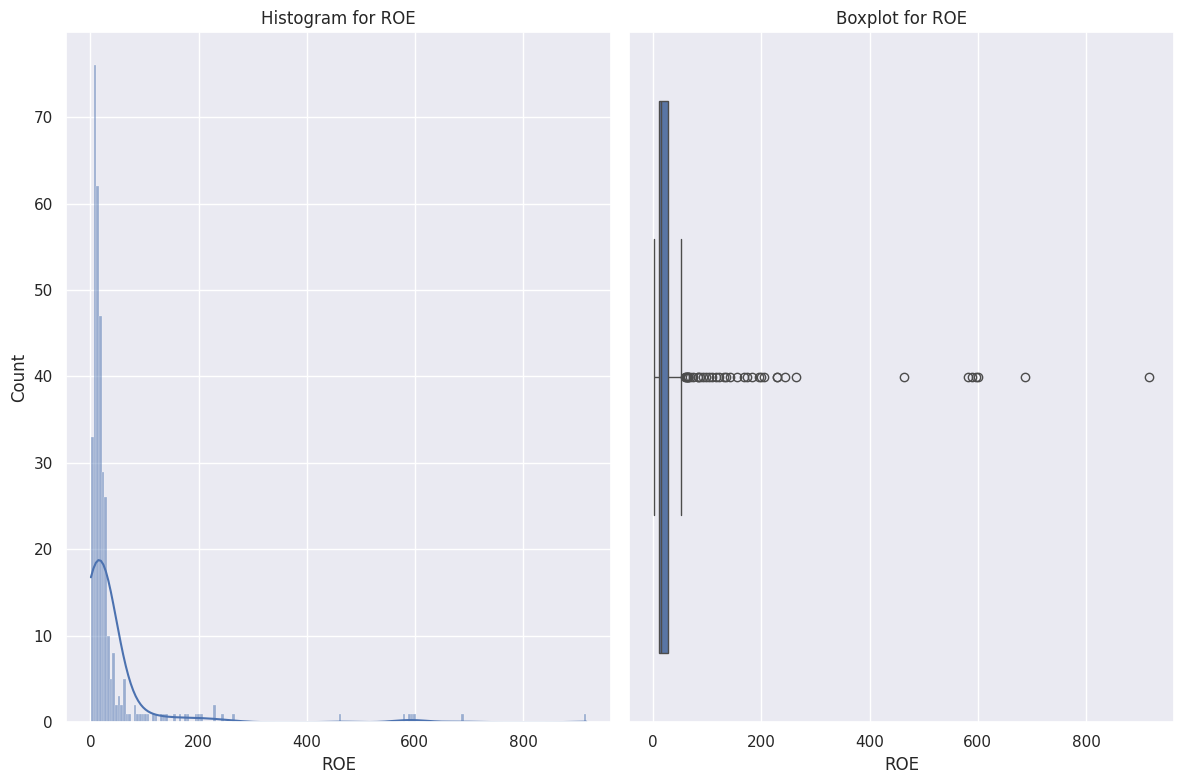

In [15]:
plot_column(df, 'ROE')

**Observations:**
Right Skewed Distribution: The data exhibits a strong right-skewed distribution. This means that a majority of companies have a relatively low ROE, while a small number of companies have exceptionally high ROE values, pulling the tail of the distribution to the right.

Presence of Outliers: The boxplot clearly indicates the presence of several outliers. These outliers represent companies with significantly higher ROE compared to the majority. These outliers could be due to various factors such as exceptional performance, unique business models, or potentially even anomalies in the data.

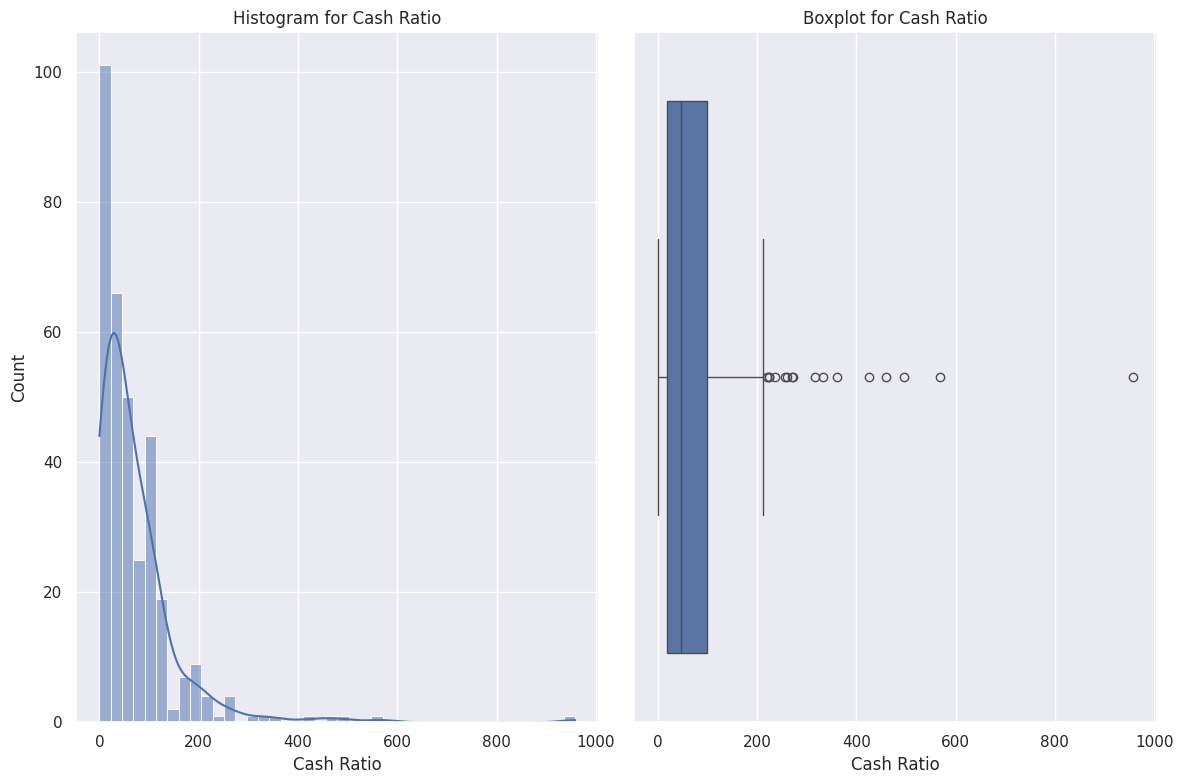

In [16]:
plot_column(df, 'Cash Ratio')

**Obsevations:**

Right Skewed Distribution: The data exhibits a strong right-skewed distribution. This means that a majority of companies have a relatively low Cash Ratio, while a small number of companies have exceptionally high Cash Ratios, pulling the tail of the distribution to the right.

Presence of Outliers: The boxplot clearly indicates the presence of several outliers. These outliers represent companies with significantly higher Cash Ratios compared to the majority. These outliers could be due to various factors such as strong cash reserves, recent investments, or other unique financial circumstances.

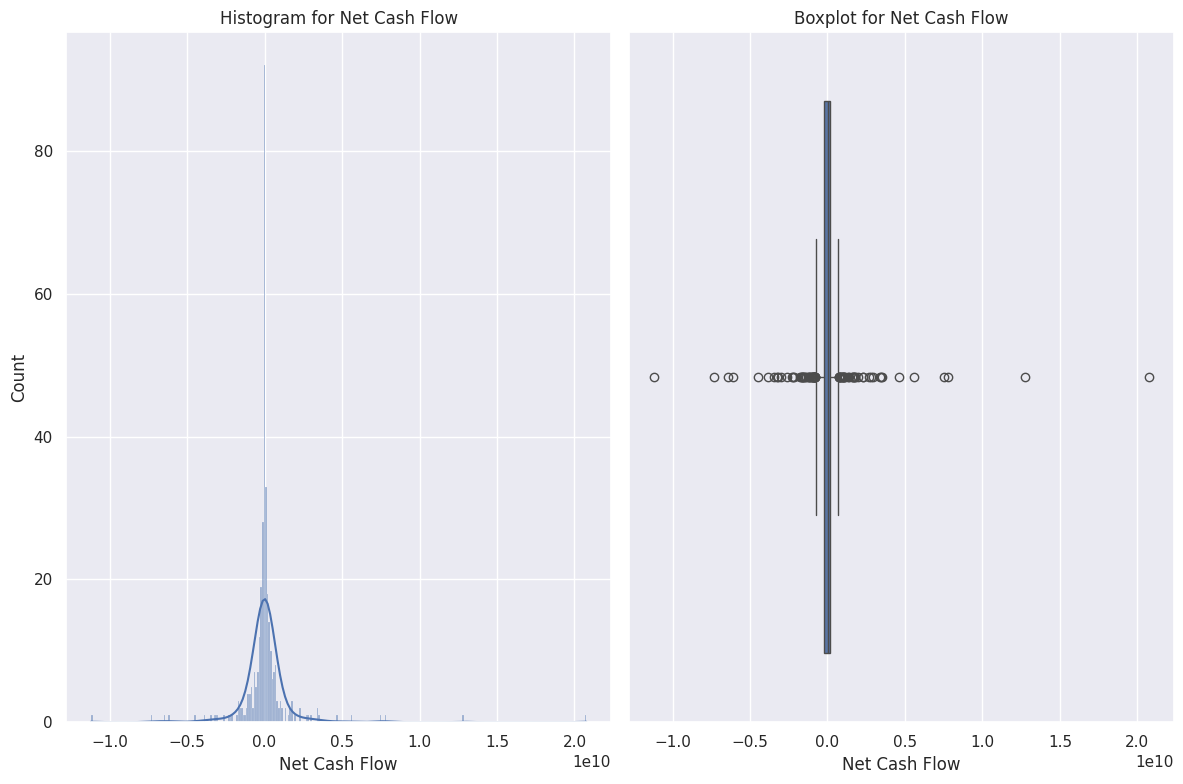

In [17]:
plot_column(df, 'Net Cash Flow')

**Observations:**

Near-Symmetric Distribution: The histogram and boxplot suggest a distribution that is close to being symmetric, with a slight skew to the right. This indicates that a majority of companies have net cash flows around the central value, with a smaller number of companies having significantly higher or lower net cash flows.

Presence of Outliers: The boxplot clearly indicates the presence of several outliers, particularly on the higher end of the net cash flow spectrum. These outliers represent companies with exceptionally high net cash flows compared to the majority of the companies.

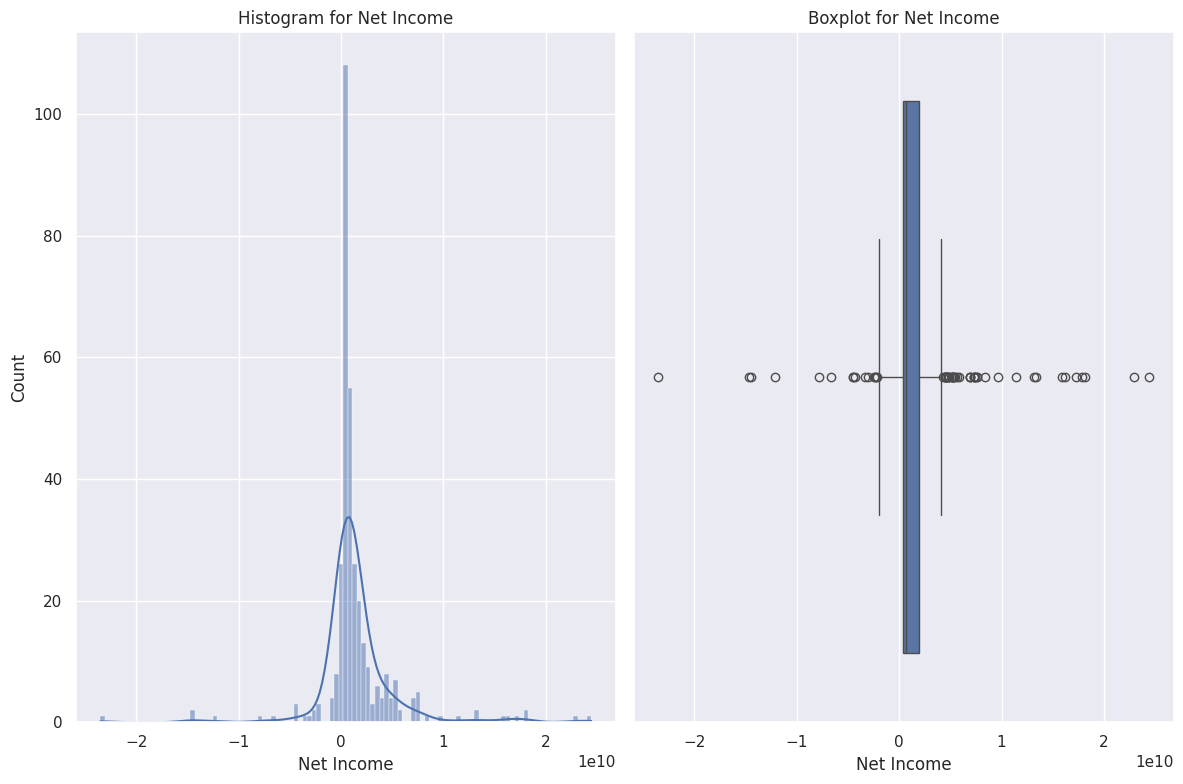

In [18]:
plot_column(df, 'Net Income')

**Observations:**

Near-Symmetric Distribution: The histogram and boxplot suggest a distribution that is close to being symmetric, with a slight skew to the right. This indicates that a majority of companies have net income values around the central value, with a smaller number of companies having significantly higher or lower net incomes.

Presence of Outliers: The boxplot clearly indicates the presence of several outliers, particularly on both the higher and lower ends of the net income spectrum. These outliers represent companies with exceptionally high or low net income compared to the majority of the companies.

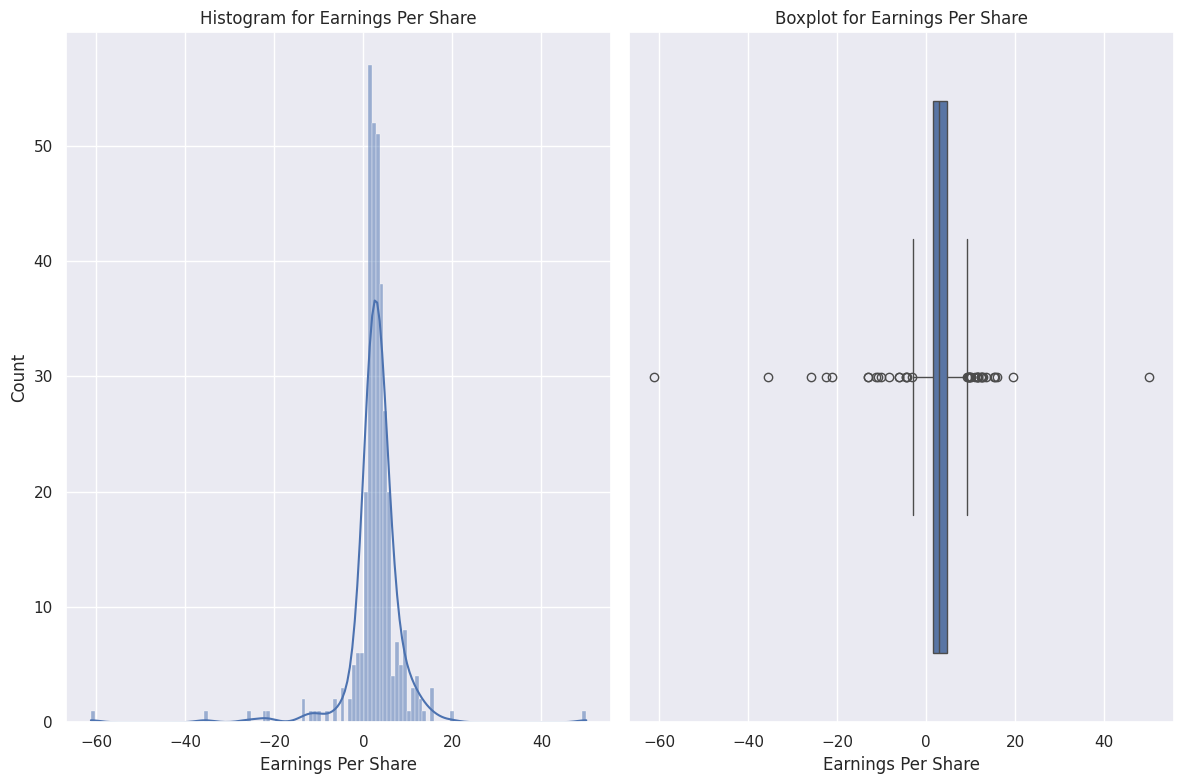

In [19]:
plot_column(df, 'Earnings Per Share')

**Observations:**

Near-Symmetric Distribution: The histogram and boxplot suggest a distribution that is close to being symmetric, with a slight skew to the right. This indicates that a majority of companies have Earnings Per Share (EPS) values around the central value, with a smaller number of companies having significantly higher or lower EPS.

Presence of Outliers: The boxplot clearly indicates the presence of several outliers, particularly on both the higher and lower ends of the EPS spectrum. These outliers represent companies with exceptionally high or low EPS compared to the majority of the companies.

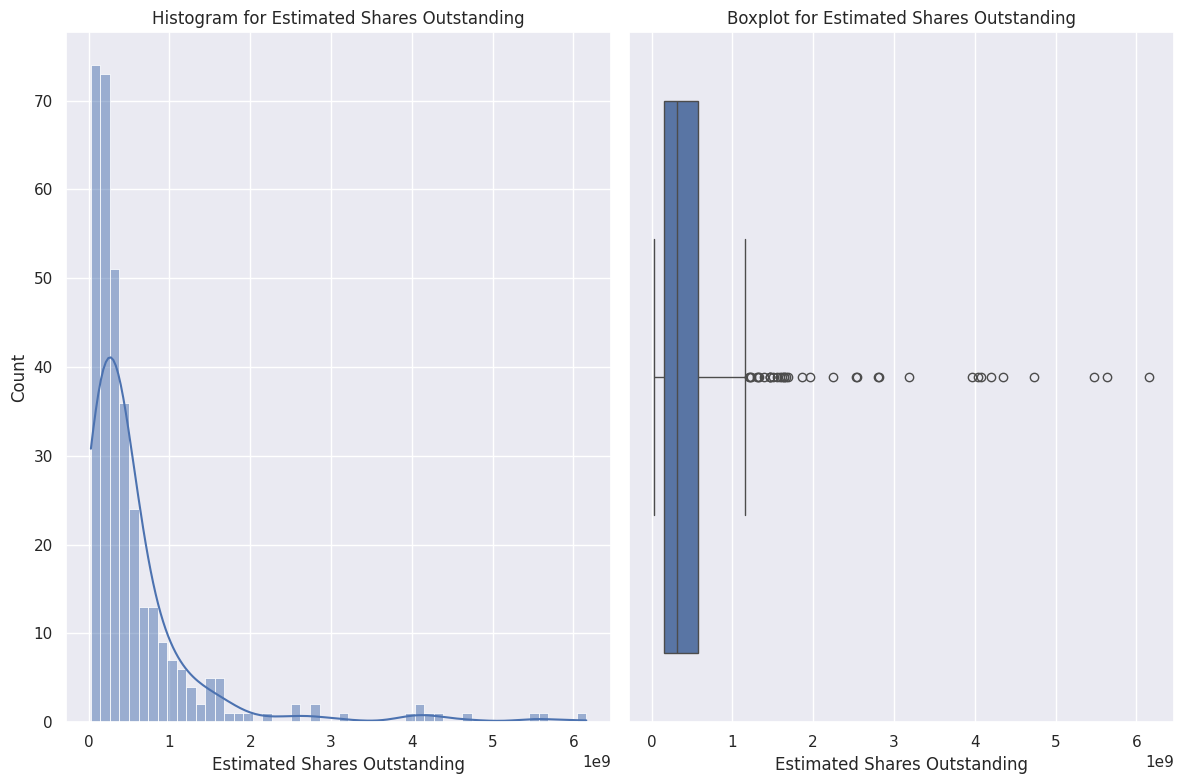

In [20]:
plot_column(df, 'Estimated Shares Outstanding')

**Observations:**

Right Skewed Distribution: The histogram and boxplot clearly show a right-skewed distribution. This means that a majority of companies have a relatively low number of estimated shares outstanding, while a small number of companies have exceptionally high numbers of shares outstanding, pulling the tail of the distribution to the right.

Presence of Outliers: The boxplot clearly indicates the presence of several outliers, particularly on the higher end of the estimated shares outstanding spectrum. These outliers represent companies with exceptionally high numbers of shares outstanding compared to the majority of the companies.

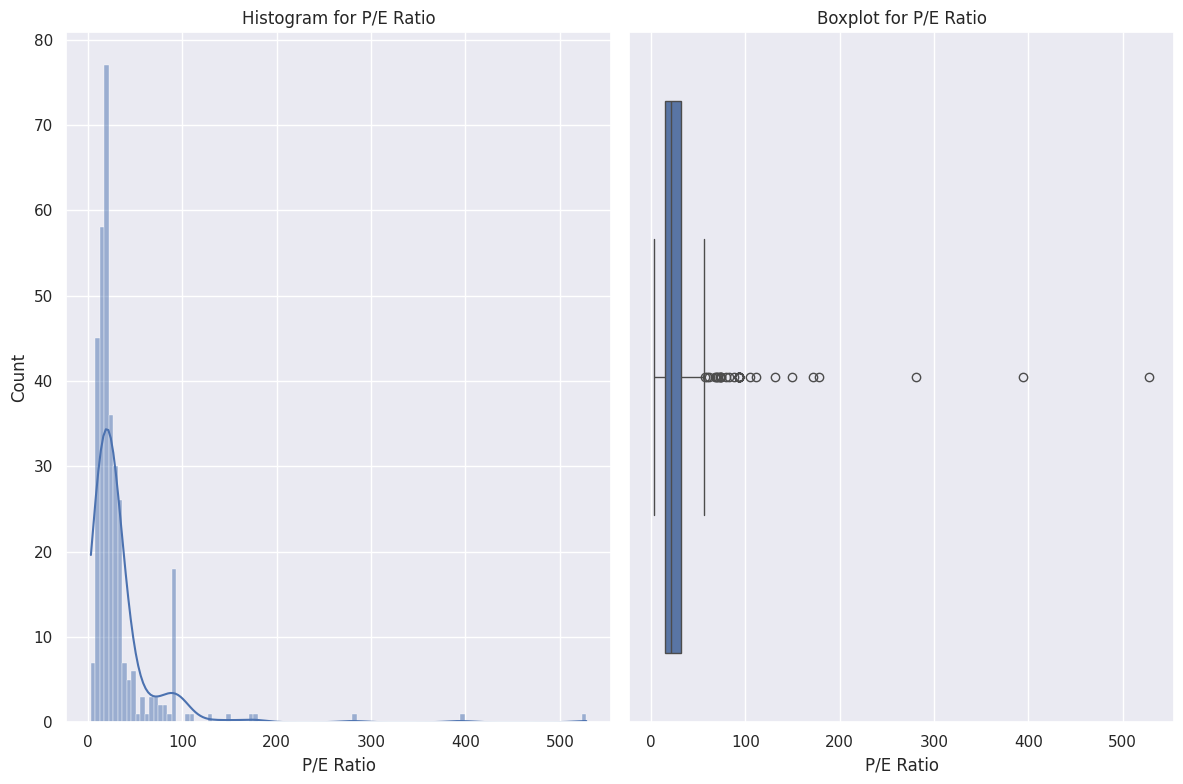

In [21]:
plot_column(df, 'P/E Ratio')

**Observations:**

Right Skewed Distribution: The histogram and boxplot clearly show a right-skewed distribution. This means that a majority of companies have a relatively low P/E Ratio, while a small number of companies have exceptionally high P/E Ratios, pulling the tail of the distribution to the right.

Presence of Outliers: The boxplot clearly indicates the presence of several outliers, particularly on the higher end of the P/E Ratio spectrum. These outliers represent companies with exceptionally high P/E Ratios compared to the majority of the companies. These high P/E ratios might indicate high growth expectations or potential overvaluation.

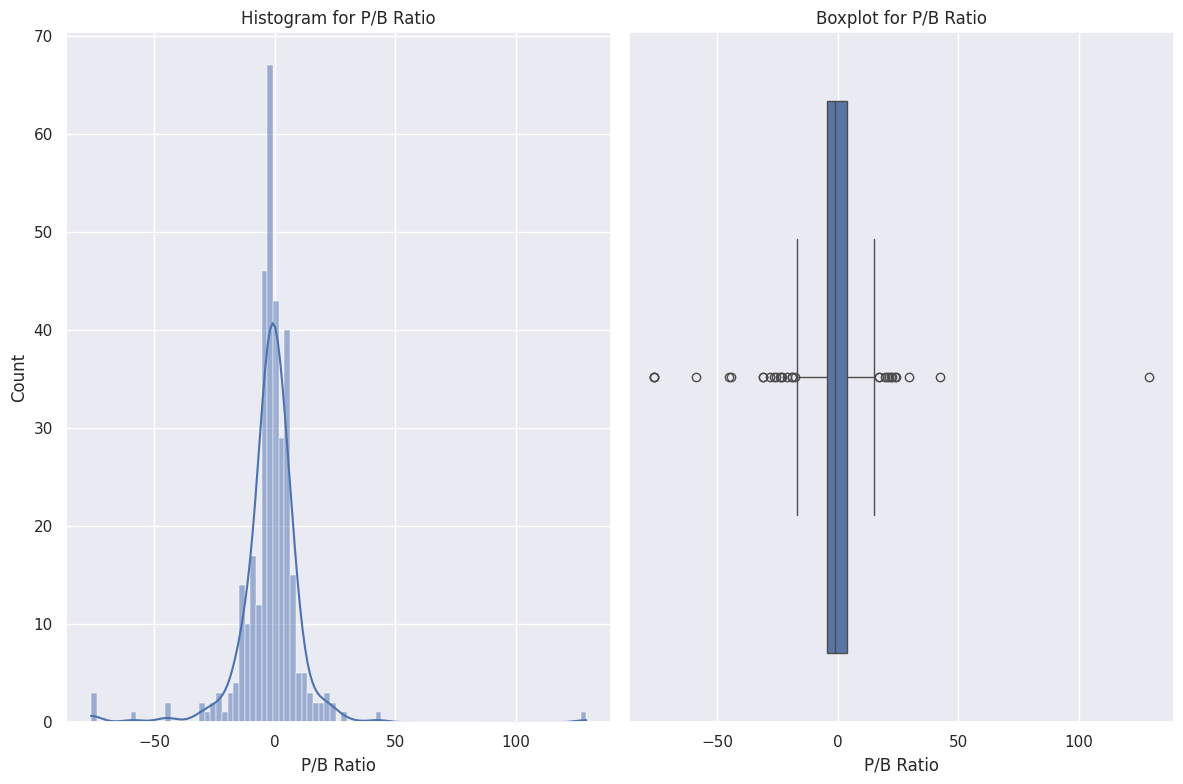

In [22]:
plot_column(df, 'P/B Ratio')

**Observations:**

Slightly Right Skewed Distribution: The histogram and boxplot clearly show a nearly right-skewed distribution. This means that a majority of companies have a relatively low P/B Ratio, while a small number of companies have exceptionally high P/B Ratios, pulling the tail of the distribution to the right.

Presence of Outliers: The boxplot clearly indicates the presence of several outliers, particularly on the higher end of the P/B Ratio spectrum. These outliers represent companies with exceptionally high P/B Ratios compared to the majority of the companies. These high P/B ratios might indicate high growth expectations or potential overvaluation.

In [23]:
num_unique = df["Security"].nunique()
print(num_unique)



340


**Observations:**
The "Security" column in the dataset has 340 unique values, indicating that there are 340 distinct security types or identifiers in the data.

In [24]:

num_unique1 = df["GICS Sub Industry"].nunique()
print(num_unique1)


104


**Observations:**

The "GICS Sub Industry" column has 104 unique values, indicating that the dataset covers a diverse range of sub-industries.

##Bivariate Analysis

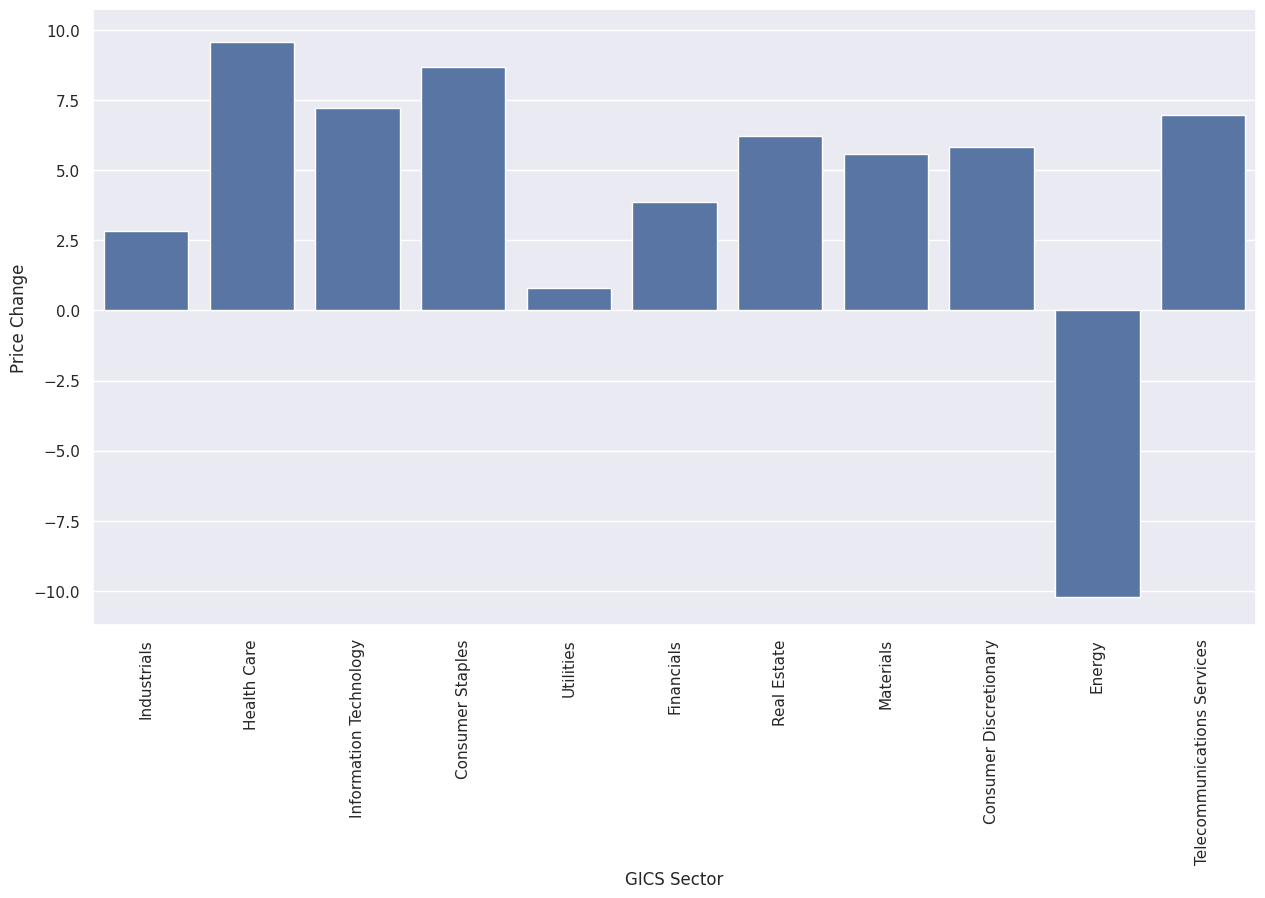

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**

Sector Performance Varies: Some sectors like Health Care and Information Technology show significant price increases, while others like Energy have experienced substantial price decreases.

Among the sectors shown, Health Care appears to have the highest price change followed by Information Technology, indicating strong performance in this sector.

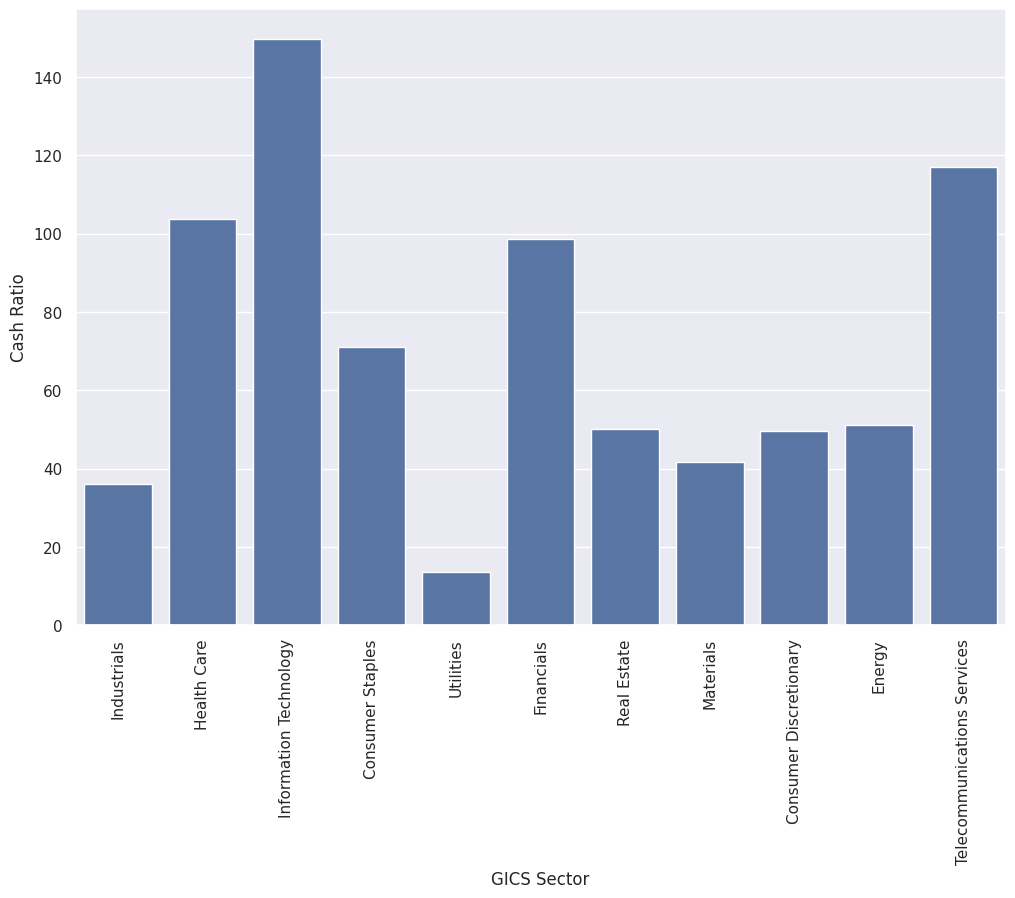

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**

- The Information Technology sector has the highest Cash Ratio, followed by Telecommunications Services and Health Care, indicating that these sectors have relatively high liquidity.
- The Utilities sector has the lowest Cash Ratio, suggesting that companies in this sector might have lower cash reserves relative to their liabilities compared to other sectors.

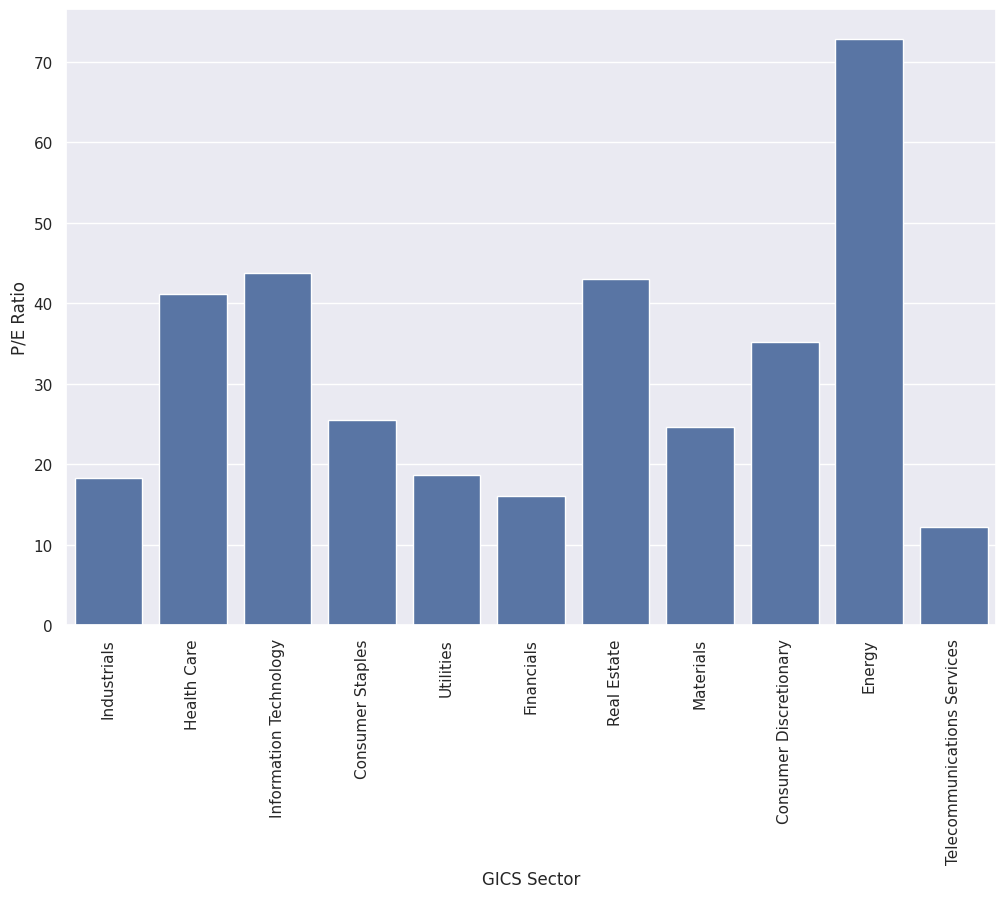

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()


**Observations:**

- The Energy sector has the highest P/E Ratio, indicating that investors may have high growth expectations for companies in this sector.

- The Telecommunications Services sector has the lowest P/E Ratio, suggesting that investors might perceive slower growth or lower earnings potential in this sector.

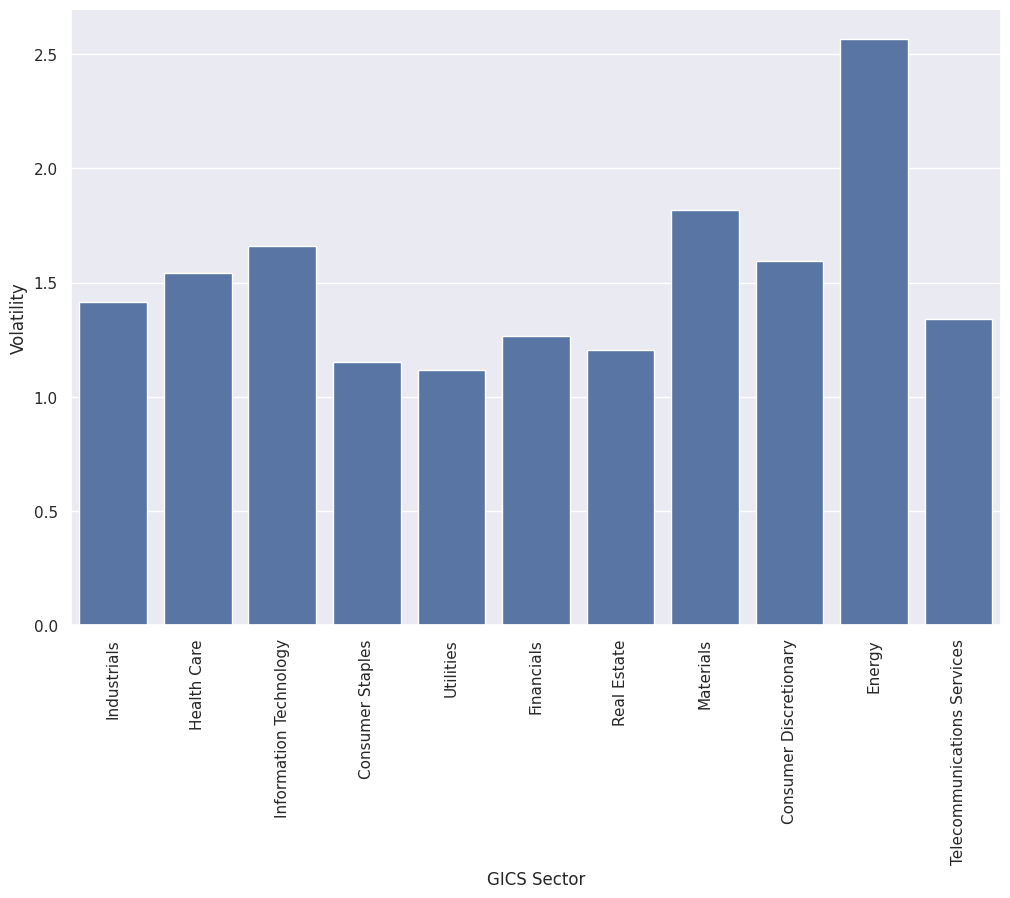

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**

- The Energy sector exhibits the highest volatility, indicating a higher level of risk and price fluctuations compared to other sectors.

- The Consumer Staples and Utilities sectors have relatively lower volatility, suggesting more stable and less risky investment options.








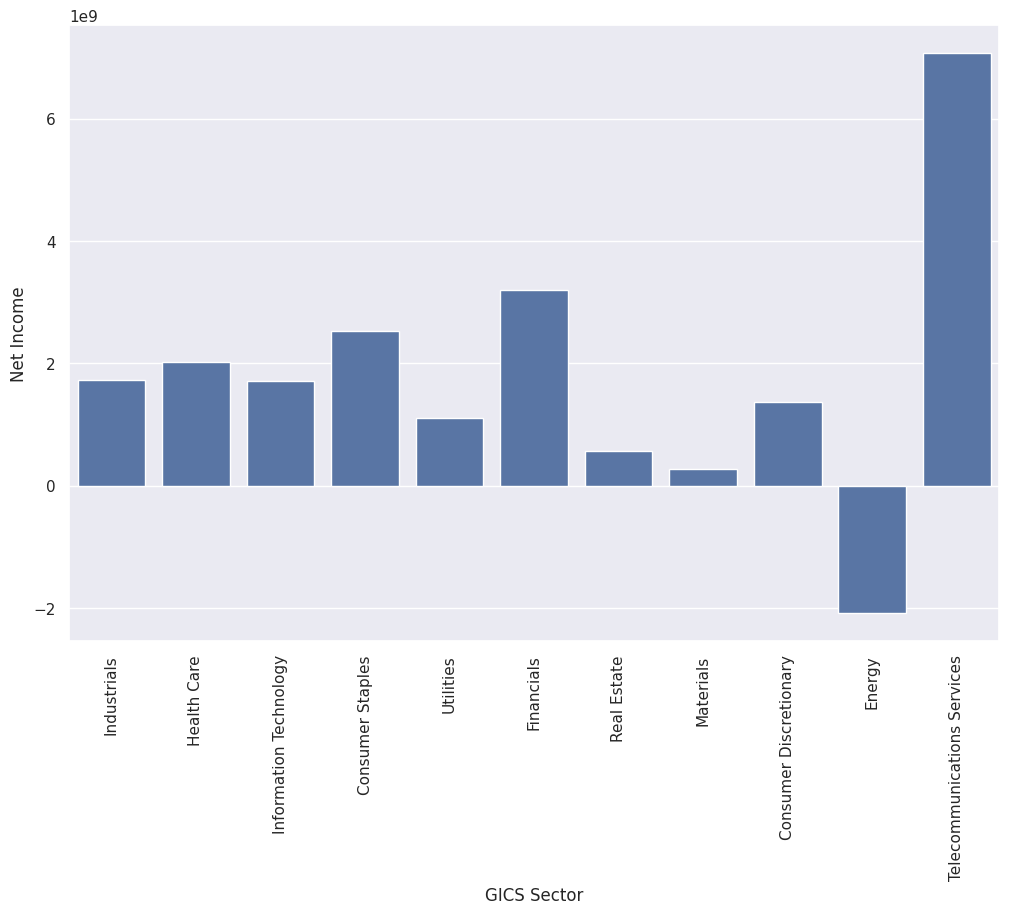

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='GICS Sector', y='Net Income', ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**

- The Telecommunications Services sector has the highest net income, significantly outperforming other sectors.
- The Energy sector shows a negative net income, indicating financial losses, unlike other sectors that mostly exhibit positive net income.

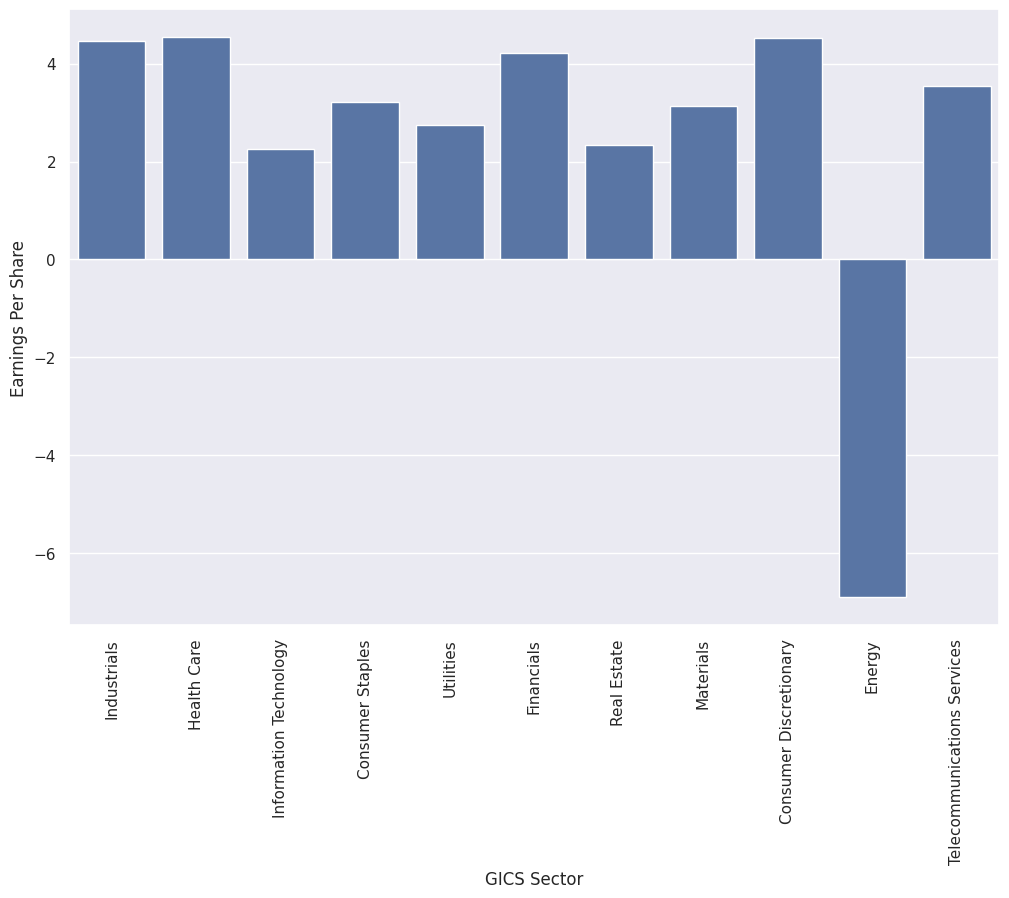

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='GICS Sector', y='Earnings Per Share', ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**

- The Energy sector has a negative earnings per share (EPS), indicating financial underperformance compared to other sectors.
- Most other sectors have a positive EPS, with Health Care and Consumer Discretionary sectors having the highest values.

##Multivariate

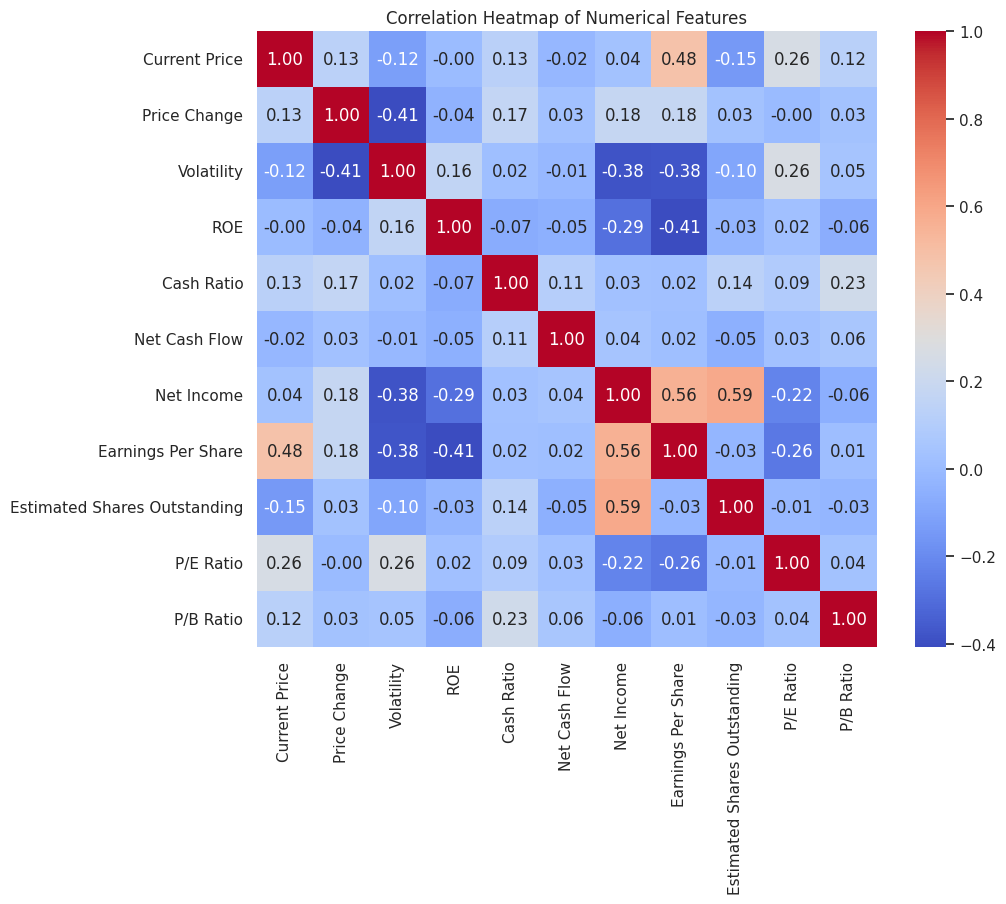

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

**Observations from the Correlation Heatmap:**  

1. **Earnings Per Share (EPS) is strongly correlated with Net Income (0.56) and Return on Equity (ROE) (0.56).** This suggests that higher net income and ROE generally lead to higher EPS.  
2. **Volatility has a negative correlation with EPS (-0.38) and Net Income (-0.38).** This indicates that higher volatility tends to be associated with lower earnings and income stability.  
3. **Price Change and Volatility have a moderate negative correlation (-0.41),** meaning that greater price swings tend to come with increased volatility.  
4. **The P/E Ratio has a weak positive correlation with Current Price (0.26) and Volatility (0.26),** implying that higher-priced stocks may have higher valuations and experience more price fluctuations.  
5. **Estimated Shares Outstanding negatively correlates with EPS (-0.26) and P/E Ratio (-0.01),** suggesting that companies with more outstanding shares tend to have lower per-share earnings.

<Figure size 1200x1200 with 0 Axes>

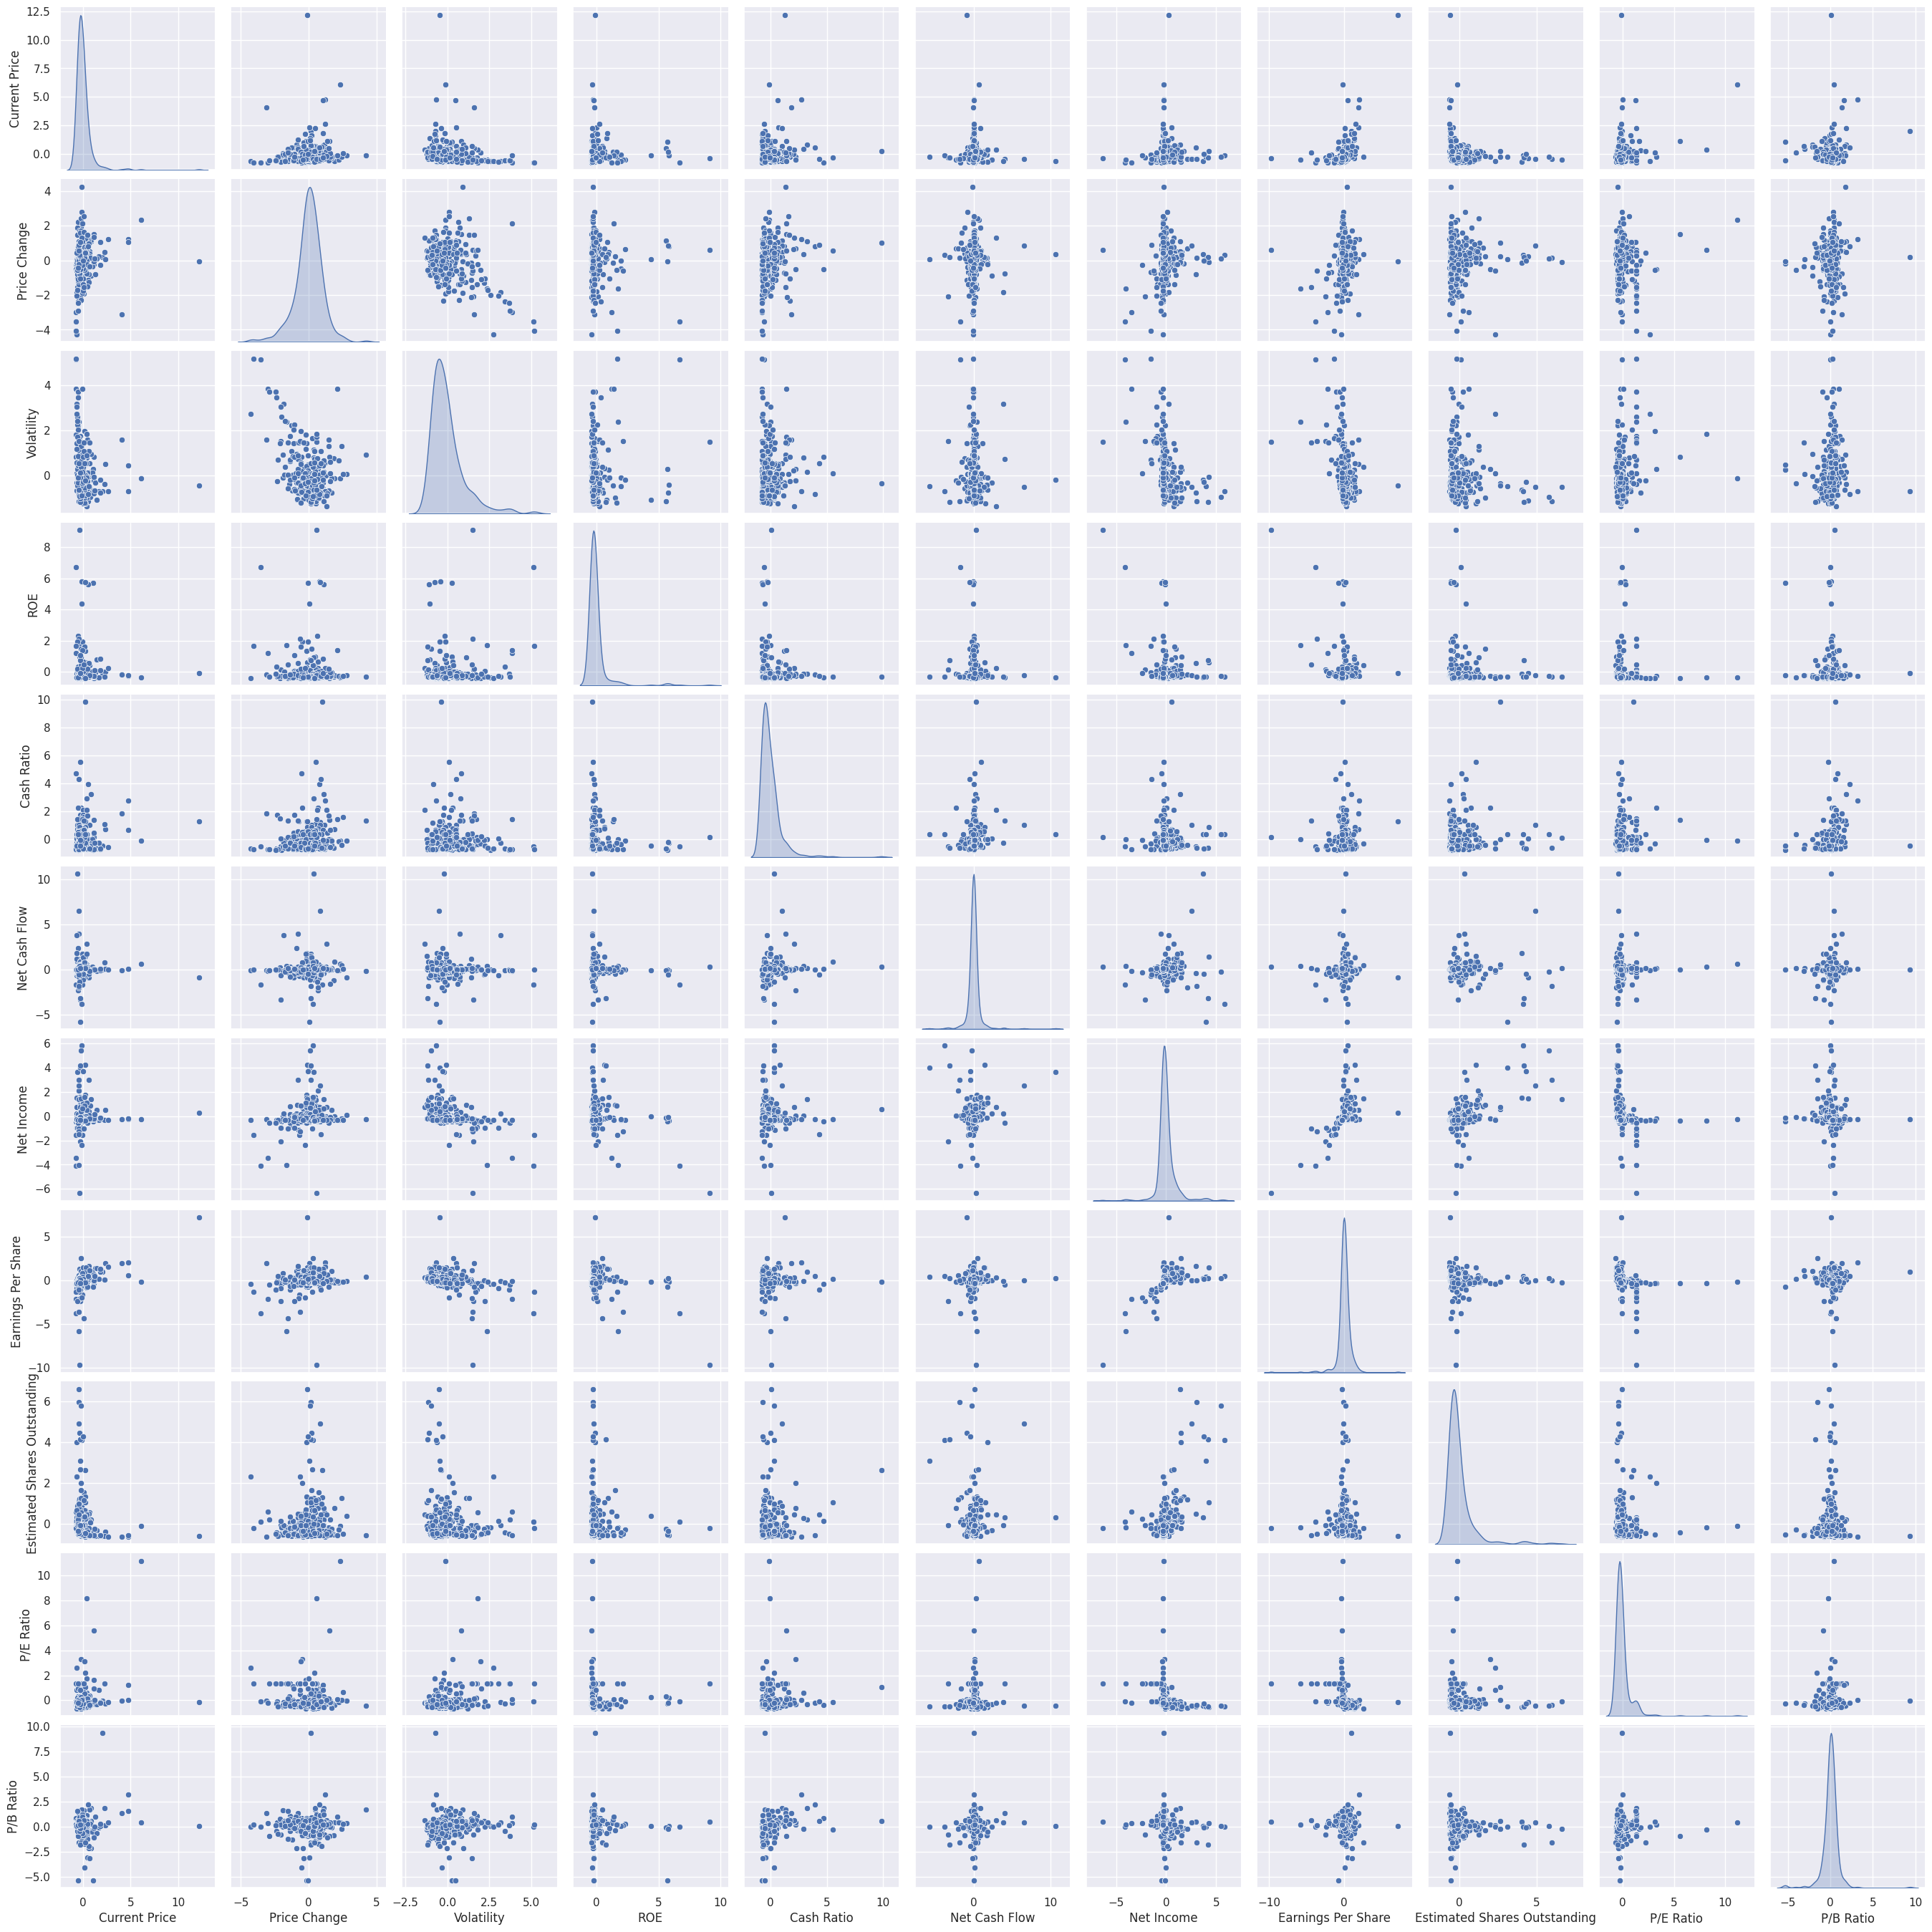

In [32]:
from scipy.stats import zscore

# Selecting only numerical attributes
num_attributes = df.select_dtypes(include=['number'])

# Applying z-score normalization
scaled_attributes = num_attributes.apply(zscore)

# Setting plot size
plt.figure(figsize=(12, 12))

# Creating a pair plot with larger size
sns.pairplot(scaled_attributes, diag_kind='kde', height=2.5, aspect=1)

# Show the plot
plt.show()

**Observations:**


1. **Distributions of Individual Variables:**  
   - Some variables, such as **Current Price, Earnings Per Share, and P/E Ratio**, appear to be **skewed** (long tails).
   - **Net Cash Flow and Net Income** have extreme values, indicating the presence of potential outliers.

2. **Relationships Between Variables:**  
   - **Earnings Per Share (EPS) vs. Net Income**: Shows a strong positive correlation, which is expected since EPS is derived from net income.
   - **Current Price vs. P/E Ratio**: A possible positive trend can be seen, but with some dispersion.
   - **Volatility vs. Price Change**: There is no strong linear correlation, but some patterns suggest that higher volatility may lead to wider price swings.
   - **Net Cash Flow vs. ROE**: Appears to have a weak correlation, suggesting that cash flow does not always translate into a high return on equity.

3. **Clustering & Outliers:**  
   - Some plots show **distinct clusters**, indicating groups of stocks with similar characteristics.
   - Certain points lie far away from the main clusters, indicating **potential outliers** that may need further investigation.

4. **Lack of Strong Linear Relationships:**  
   - Many variable pairs do not show strong linear correlations, suggesting that a non-linear model might be better suited for analysis.
   - There is considerable **scatter** in most relationships, meaning other factors might be influencing the stock metrics.

##Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Scaling the data

In [33]:
# let's check for duplicate values in the data
df.groupby(df.duplicated(subset=None, keep="first"), as_index=False).size()

,index,size
0,False,340


**Observations:**
- No Duplicate Rows: The dataset does not contain any duplicate values, as all 340 rows are unique.

- Data Integrity Maintained: Since there are no duplicates, the dataset is clean and does not require additional preprocessing steps for duplicate removal.

In [34]:
# let's check for missing values in the data
df.isnull().sum()
print(" \nCount total NaN (or) Missing values : \n\n", df.isnull().sum())

 
Count total NaN (or) Missing values : 

 Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64


Observations:

- No Missing Values: The dataset is complete, with no missing or NaN values in any of the columns.

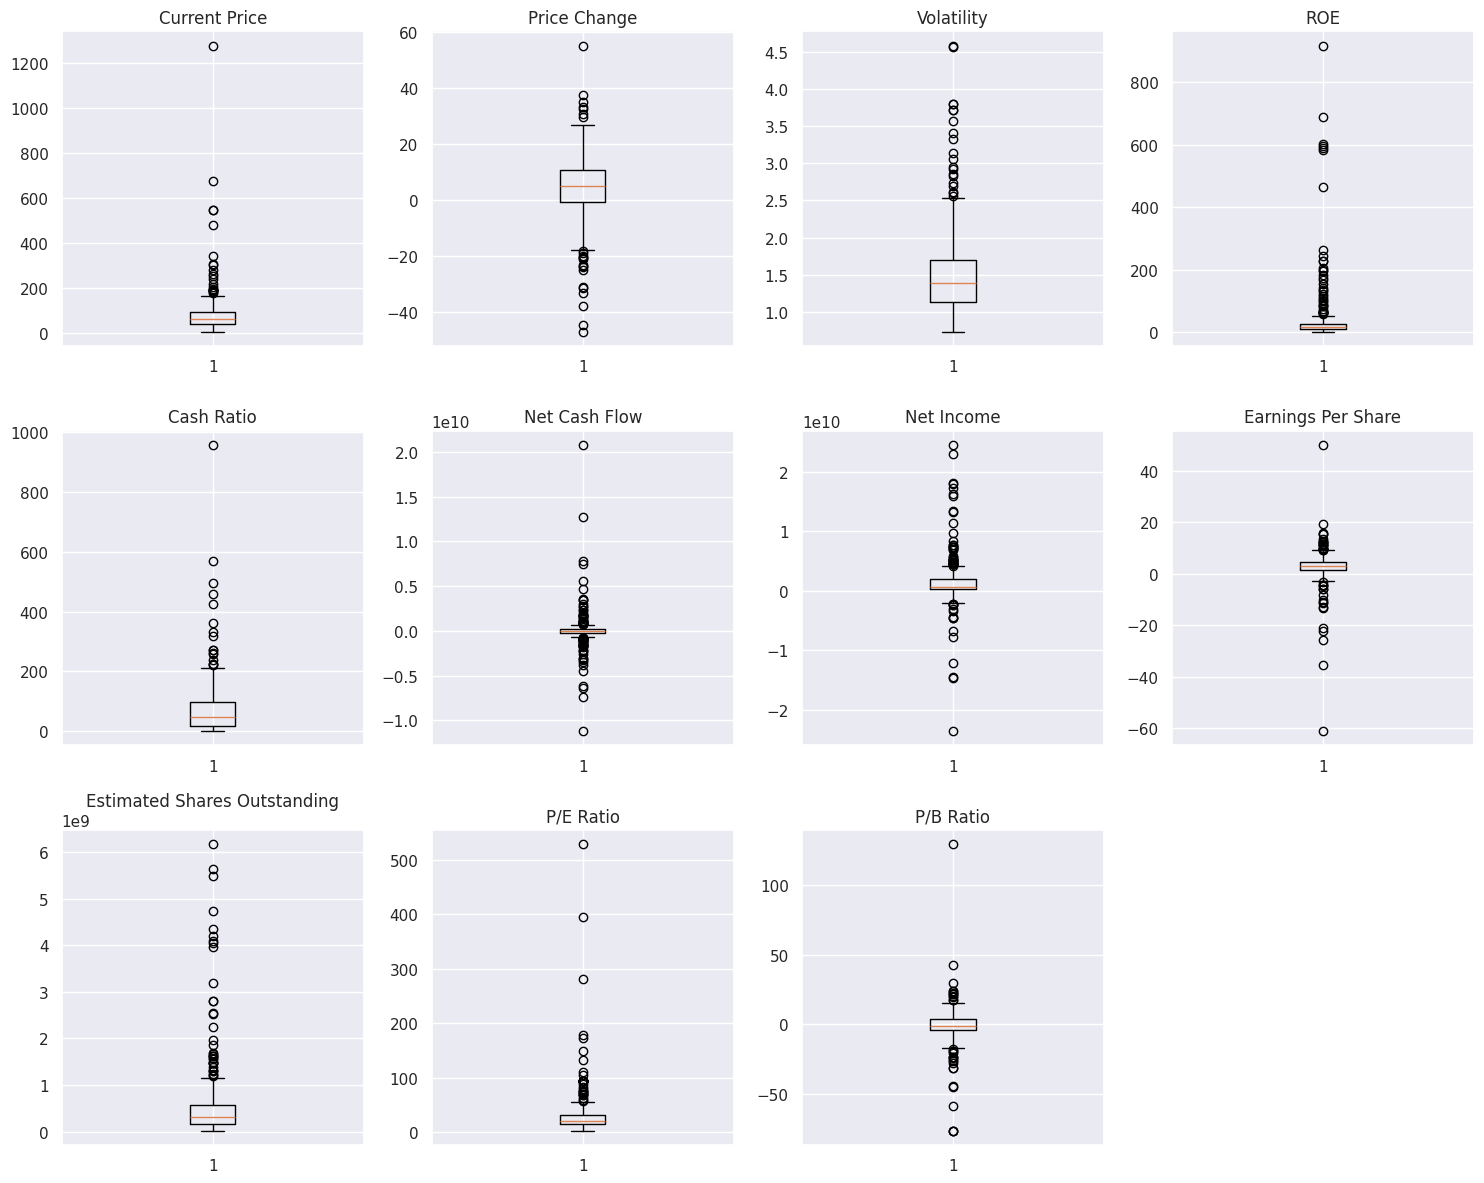

In [35]:
#Outlier Check
# outlier detection using boxplot
import numpy as np
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [49]:
# scaling the data before clustering

# selecting numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411
Number of Clusters: 9 	Average Distortion: 1.956222103389025
Number of Clusters: 10 	Average Distortion: 1.9360473996664198
Number of Clusters: 11 	Average Distortion: 1.8615942883461607
Number of Clusters: 12 	Average Distortion: 1.8219574388532505
Number of Clusters: 13 	Average Distortion: 1.7936924742607907
Number of Clusters: 14 	Average Distortion: 1.7567842179093438


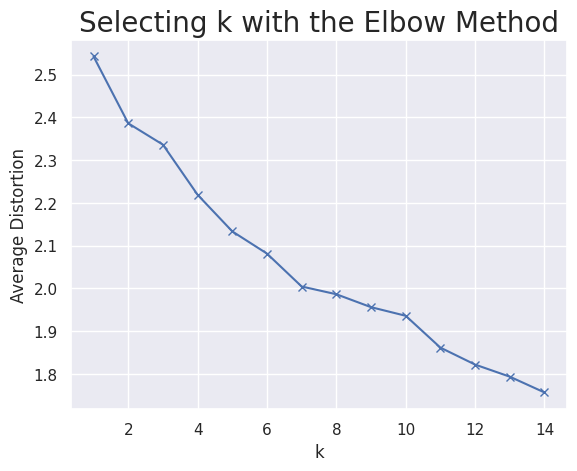

In [37]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

k_means_df = subset_scaled_df.copy()
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

Based on the plot, k = 4 seems reasonable.

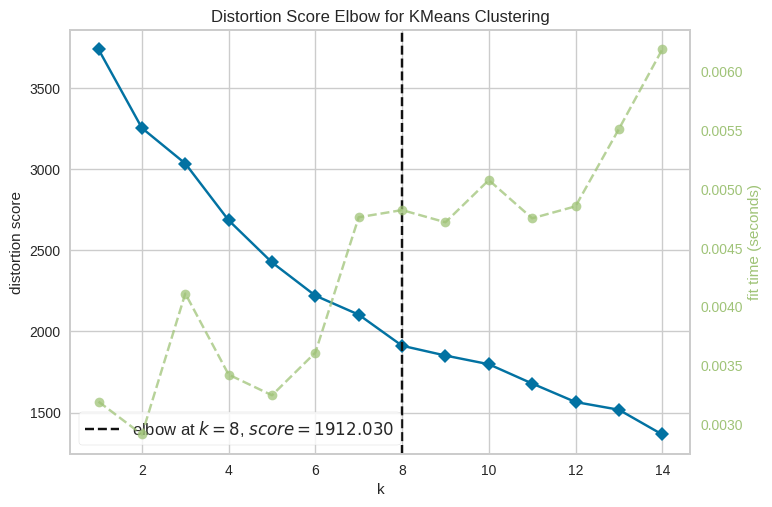

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)
visualizer.show()

For n_clusters = 2, the silhouette score is 0.45335782729503565)
For n_clusters = 3, the silhouette score is 0.40374060030338865)
For n_clusters = 4, the silhouette score is 0.4246430808437099)
For n_clusters = 5, the silhouette score is 0.4381539778147092)
For n_clusters = 6, the silhouette score is 0.40869599703024256)
For n_clusters = 7, the silhouette score is 0.1207450219233897)
For n_clusters = 8, the silhouette score is 0.3693991650696542)
For n_clusters = 9, the silhouette score is 0.35185096182499204)
For n_clusters = 10, the silhouette score is 0.32950073703610283)
For n_clusters = 11, the silhouette score is 0.1486586842527321)
For n_clusters = 12, the silhouette score is 0.15784241071085106)
For n_clusters = 13, the silhouette score is 0.15646997458716602)
For n_clusters = 14, the silhouette score is 0.16253506827999134)


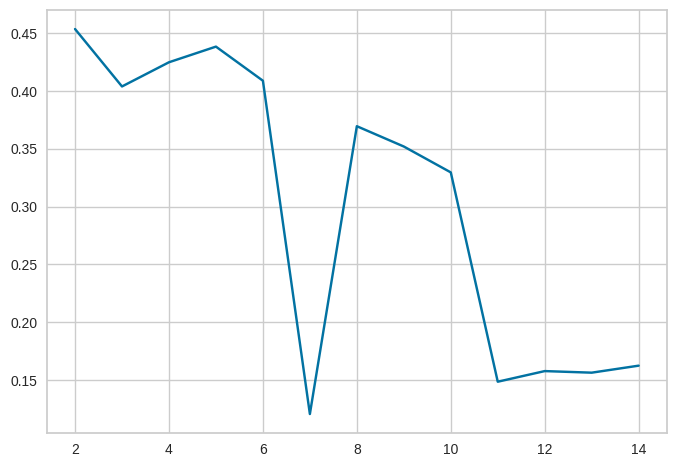

In [39]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

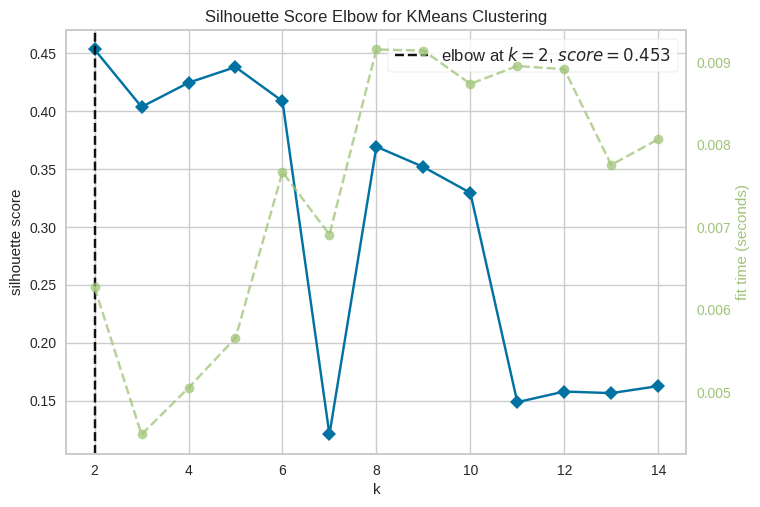

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [40]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)
visualizer.show()

Appropriate value for K seems to be 8.

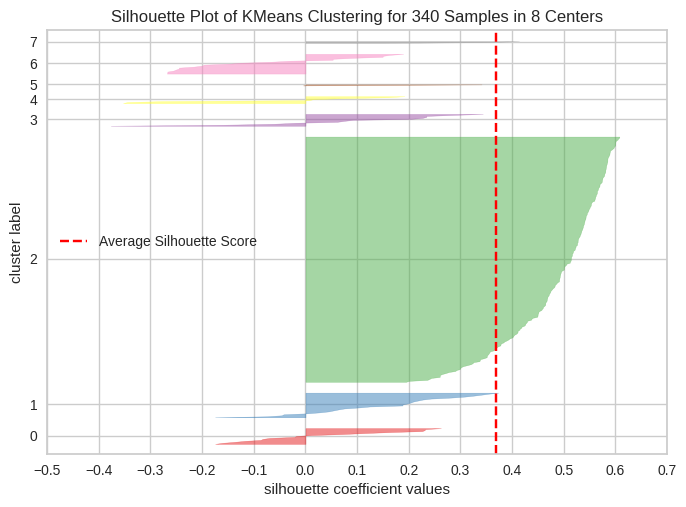

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Let's take 8 as the appropriate no. of clusters

**Creating Final Model**

In [53]:
kmeans = KMeans(n_clusters=8, random_state=1)
kmeans.fit(k_means_df)

KMeans(random_state=1)

In [54]:
df1 = df.copy()

k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

**Cluster Profiling**

In [56]:

# Step 1: Ensure only numeric columns are aggregated
numeric_df = df1.select_dtypes(include='number')

# Step 2: Group by cluster and calculate mean for numeric columns
km_cluster_profile = numeric_df.groupby(df1["KM_segments"]).mean()

# Step 3: Add count of each cluster
km_cluster_profile["count_in_each_segment"] = df1.groupby("KM_segments")["Security"].count().values

# Step 4: Display the cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_segments,count_in_each_segment
KM_segments,,,,,,,,,,,,,
0,70.442281,15.291506,1.790318,27.578947,322.631579,2411295842.105263,2281955736.842105,2.024737,1034708730.642105,43.031272,8.084604,0.000000,19
1,90.797143,4.957495,1.462532,214.142857,40.380952,-93181142.857143,2195875523.809524,4.785714,443891905.006190,22.110362,-23.952239,1.000000,21
2,70.938148,5.097432,1.365860,20.262948,53.342629,24110262.948207,1511534764.940239,3.575757,437439341.986534,23.704282,-1.777513,2.000000,251
3,459.027268,10.146323,1.647853,20.909091,138.636364,217989909.090909,890781272.727273,11.815455,155047733.943636,141.162476,20.062380,3.000000,11
4,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,4.000000,9
5,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,5.000000,1
6,12.595000,-32.515793,3.964991,311.750000,24.750000,-682750000.000000,-11462750000.000000,-18.840000,634557135.500000,59.349614,1.038511,6.000000,4
7,36.599117,-13.623286,2.715238,30.708333,50.500000,-167732958.333333,-1451275000.000000,-4.864583,487430272.276667,76.372735,1.613214,7.000000,24


In [57]:
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Allegion'
 'Affiliated Managers Group Inc' 'Anthem Inc.' 'Charter Communications'
 'Colgate-Palmolive' 'CME Group Inc.' 'Discovery Communications-A'
 'Discovery Communications-C' 'Expedia Inc.' 'IDEXX Laboratories'
 'Kimberly-Clark' 'Lockheed Martin Corp.' 'Masco Corp.' 'Altria Group Inc'
 'Pitney-Bowes' 'S&P Global, Inc.' 'United Continental Holdings'
 'United Parcel Service' 'Whirlpool Corp.']

In cluster 2, the following companies are present:
['Abbott Laboratories' 'Adobe Systems Inc' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Aon plc' 'Amphenol Corp'
 'Activision 

In [58]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     5
             Information Technology          6
             Materials                       1
             Telecommunications Services     1
1            Consumer Discretionary          5
             Consumer Staples                3
             Financials                      3
             Health Care                     3
             Industrials                     7
2            Consumer Discretionary         28
             Consumer Staples               14
             Energy                          5
             Financials                     42
             Health Care                    26
             Industrials                    44
             Information Technology         23
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
3            Consumer Discretionary          3
             Health Care                     5
             Information Technology          2
             Real Estate                     1
4            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
5            Energy                          1
6            Energy                          3
             Materials                       1
7            Energy                         19
             Industrials                     2
             Information Technology          2
             Materials                       1
Name: Security, dtype: int64

In [59]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     5
             Information Technology          6
             Materials                       1
             Telecommunications Services     1
1            Consumer Discretionary          5
             Consumer Staples                3
             Financials                      3
             Health Care                     3
             Industrials                     7
2            Consumer Discretionary         28
             Consumer Staples               14
             Energy                          5
             Financials                     42
             Health Care                    26
             Industrials                    44
             Information Technology         23
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
3            Consumer Discretionary          3
             Health Care                     5
             Information Technology          2
             Real Estate                     1
4            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
5            Energy                          1
6            Energy                          3
             Materials                       1
7            Energy                         19
             Industrials                     2
             Information Technology          2
             Materials                       1
Name: Security, dtype: int64

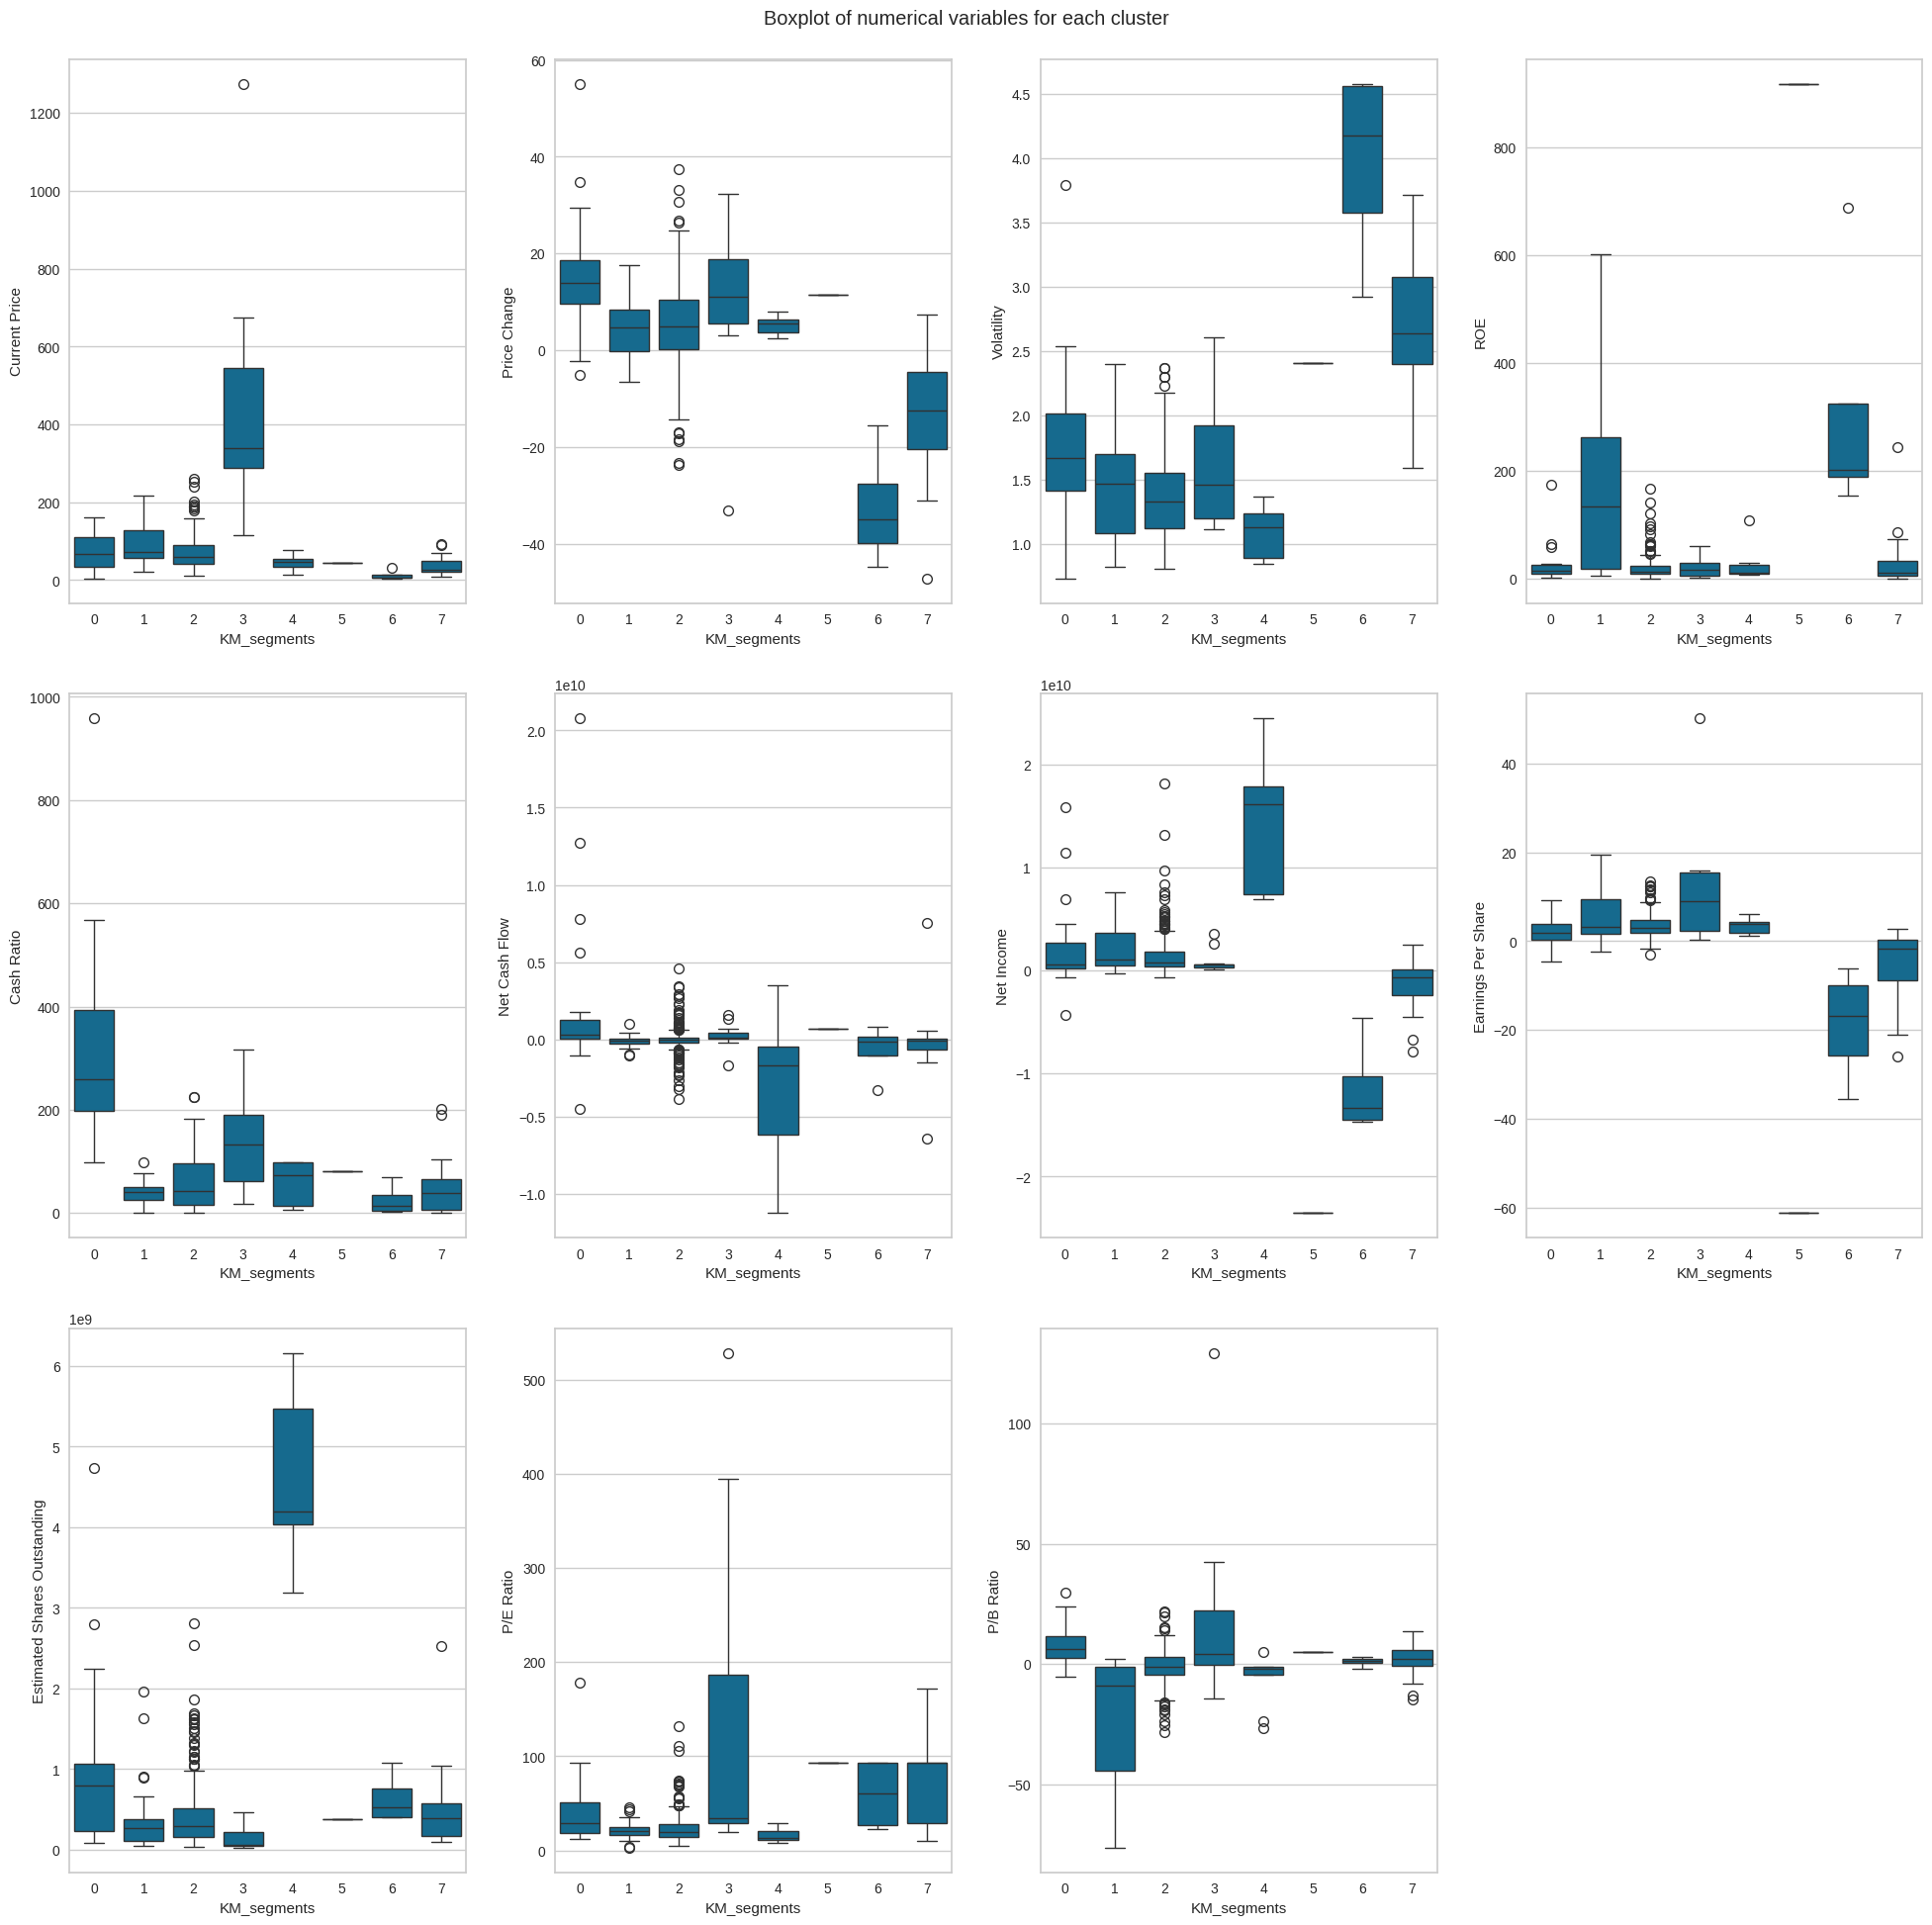

In [62]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

###Observations:


---

### 1. **Cluster Composition by GICS Sector**
- **Cluster 0:**  
  - Balanced cluster with a mix of **Information Technology** (6), **Health Care** (5), and smaller representation from other sectors.  
  - **Insight:** Represents **diversified** companies, especially in tech and healthcare.  

- **Cluster 1:**  
  - Dominated by **Industrials** (7) with a solid presence in **Consumer Discretionary** (5) and **Financials** (3).  
  - **Insight:** Likely includes **manufacturing**, **transport**, and **consumer-focused** companies.  

- **Cluster 2:**  
  - **Largest and most diverse** cluster – strong in **Industrials (44)**, **Financials (42)**, and **Health Care (26)**.  
  - **Insight:** Contains a **broad mix** of major players across key industries.  

- **Cluster 3:**  
  - Small, innovation-heavy group with **Health Care (5)** and **Information Technology (2)**.  
  - **Insight:** Likely includes **growth-oriented** and **disruptive** firms.  

- **Cluster 4:**  
  - Concentrated on **Financials (3)**, **Telecommunications (2)**, and **Energy (1)**.  
  - **Insight:** Comprises **blue-chip**, **stable** companies with a focus on **essential services**.  

- **Cluster 5:**  
  - **Single entity** (Energy sector).  
  - **Insight:** Likely an **outlier** with unique metrics or **niche** focus.  

- **Cluster 6:**  
  - Focused on **Energy (3)** and **Materials (1)**.  
  - **Insight:** Represents **natural resources** and **commodity-driven** firms.  

- **Cluster 7:**  
  - **Energy-dominated (19)** with small representations from **Industrials (2)** and **Information Technology (2)**.  
  - **Insight:** Highly concentrated in the **energy** sector with some industrial presence.  

---

### 2. **Numerical Insights from Boxplots**
**a) Market Capitalization (Market Cap)**
- **Cluster 2** has the **largest and most dispersed** market caps, likely housing **mega-cap** firms.  
- **Clusters 0, 1, and 4** have **moderate market caps**.  
- **Clusters 5 and 6** have **outliers**, indicating **specific large companies**.  

**b) Price Change**
- **Cluster 3** shows **minimal price changes**, suggesting **stability**.  
- **Cluster 2** has **high price variance**, indicating **volatile** stocks.  

**c) Volatility**
- **Cluster 7** exhibits **high volatility**, suggesting **risky** energy-focused firms.  
- **Cluster 3** shows **low volatility**, implying **stable** firms.  

**d) Price-to-Earnings Ratio (P/E)**
- **Cluster 2** has **extreme P/E values**, indicating a mix of **growth stocks** and **undervalued** firms.  
- **Cluster 5** (outlier) shows an **anomalous** P/E.  

**e) Earnings Per Share (EPS)**
- **Cluster 7** has a **broad range** of EPS values, highlighting both **profitable** and **loss-making** companies.  
- **Cluster 3** displays **low EPS variance**, suggesting **consistent** earnings.  

**f) Net Income**
- **Cluster 2** holds **large profits**, including some **massive earners**.  
- **Cluster 7** contains firms with both **negative** and **positive** net income.  

**g) Cash Ratio**
- **Cluster 4** shows **strong liquidity**, while **Cluster 2** has **mixed liquidity**.  

**h) Tangible Assets**
- **Cluster 7** possesses **high tangible assets**, consistent with **capital-intensive** energy firms.  

**i) Price-to-Book Ratio (P/B)**
- **Cluster 2** has the **widest range**, with **growth** and **value** stocks.  
- **Cluster 3** remains **consistent**, suggesting **conservative** valuations.  

---

### 3. **Cluster Characteristics Overview**

| **Cluster** | **Dominant Sectors**                 | **Key Features**                                |
|-------------|-------------------------------------|------------------------------------------------|
| **0**       | Information Technology, Health Care | Balanced, diversified mid-cap firms.            |
| **1**       | Industrials, Consumer Discretionary | Industrial-heavy, mid-sized stable firms.       |
| **2**       | Industrials, Financials, Health Care| Largest and most diverse, includes mega-caps.   |
| **3**       | Health Care, Tech                   | Innovation-focused, low volatility.             |
| **4**       | Financials, Telecom, Energy         | Blue-chip giants, stable cash flows.            |
| **5**       | Energy                              | Unique outlier – distinct financial behavior.   |
| **6**       | Energy, Materials                   | Natural resources, capital-intensive firms.     |
| **7**       | Energy                              | Energy-dominated, volatile with mixed income.   |

---

### 4. **Key Model Insights**
- **Cluster 2**: **Diverse and largest** cluster with high market caps and extreme financial variance.  
- **Cluster 7**: **Energy-centric**, **volatile**, with a wide earnings and asset range.  
- **Cluster 3**: **Low volatility**, consistent earnings – likely **mature** and **stable** firms.  
- **Cluster 5**: **Outlier**, suggesting **specialized** or **anomalous** behavior.  

Would you like a **visual breakdown** of these insights (e.g., a heatmap or cluster comparison) or further **interpretations**? 🌟

##Hierarchical Clustering

Computing Cophenetic Clustering

In [63]:
import scipy
hc_df = subset_scaled_df.copy()
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform

In [64]:
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Euclidean distance**

In [65]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Checking Dendrograms**

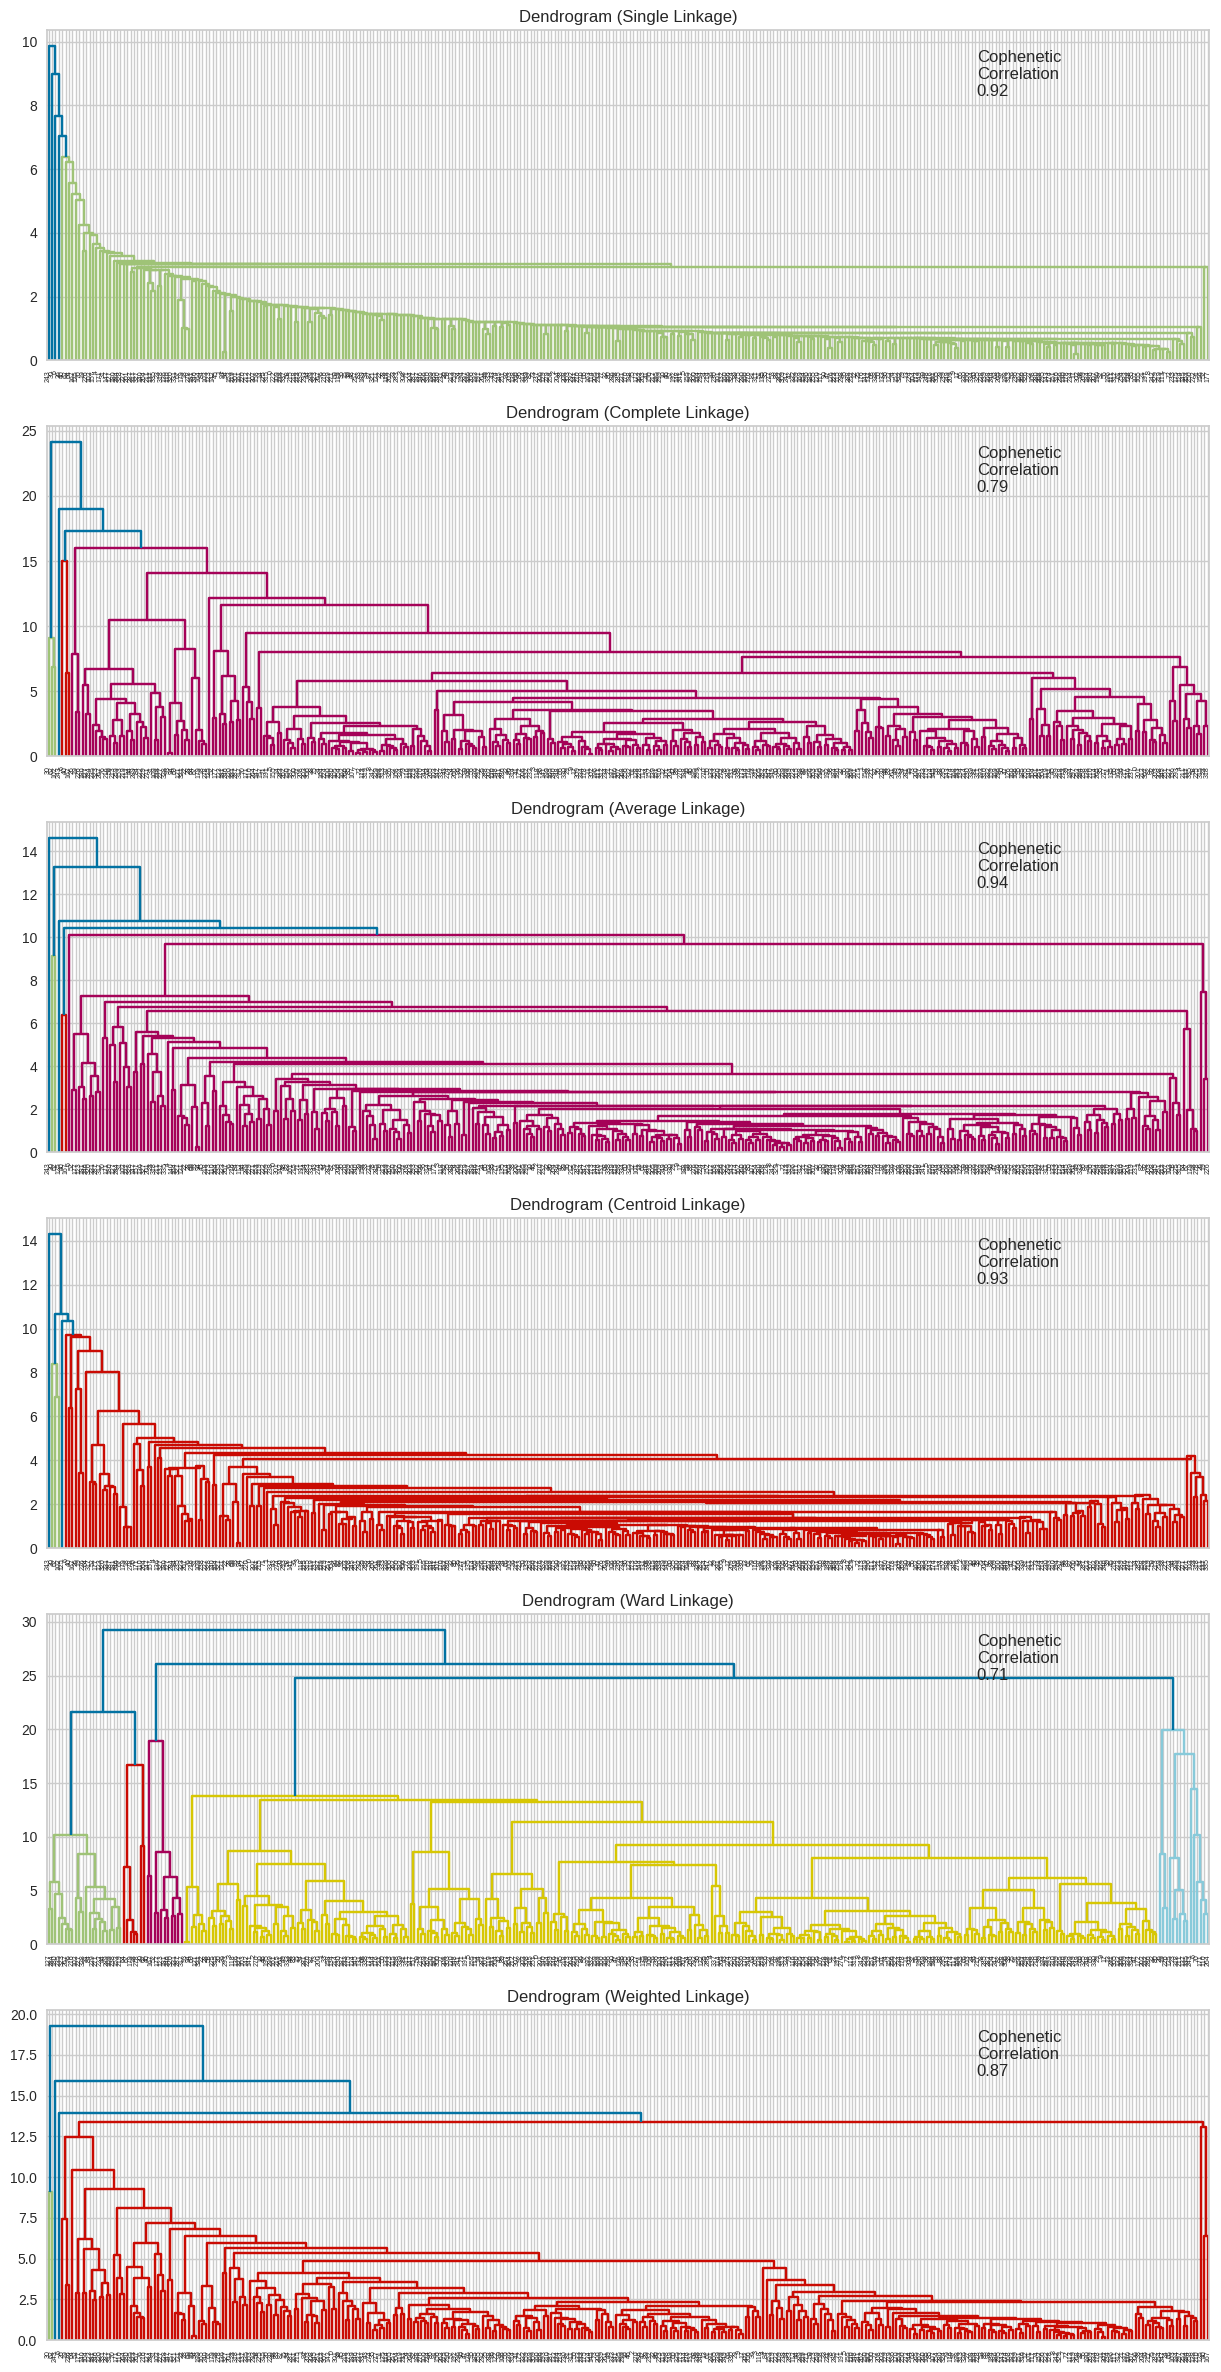

In [66]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [67]:
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


**Observations** on Linkage Methods and Cophenetic Coefficient:

Average Linkage (0.942):

Best-performing method with the highest cophenetic coefficient (0.942).
This indicates that average linkage preserves the original pairwise distances most accurately and is the most suitable method for your hierarchical clustering.


Creating model using sklearn

In [91]:
from sklearn.cluster import AgglomerativeClustering

HCmodel = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="average")  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=5)

Cluster Profiling

In [92]:
df2 = df.copy()

hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [93]:
# Filter numeric columns
numeric_df2 = df2.select_dtypes(include='number')

# Group by "HC_segments" and calculate the mean
hc_cluster_profile = numeric_df2.groupby(df2["HC_segments"]).mean()

# Add the count of rows in each segment
hc_cluster_profile["count_in_each_segment"] = df2.groupby("HC_segments")["Security"].count().values

# Highlight the maximum values
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_segments,count_in_each_segment
HC_segments,,,,,,,,,,,,,
0,76.979246,4.142346,1.516898,35.200000,67.280597,67033707.462687,1610408549.253731,2.887716,573826376.546119,32.329515,-2.152930,0.000000,335
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1.000000,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2.000000,2
3,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,3.000000,1
4,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,4.000000,1


In [94]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC Inc.'
 'The Bank of New Yo

In [95]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         31
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
3            Information Technology          1
4            Information Technology          1
Name: Security, dtype: int64

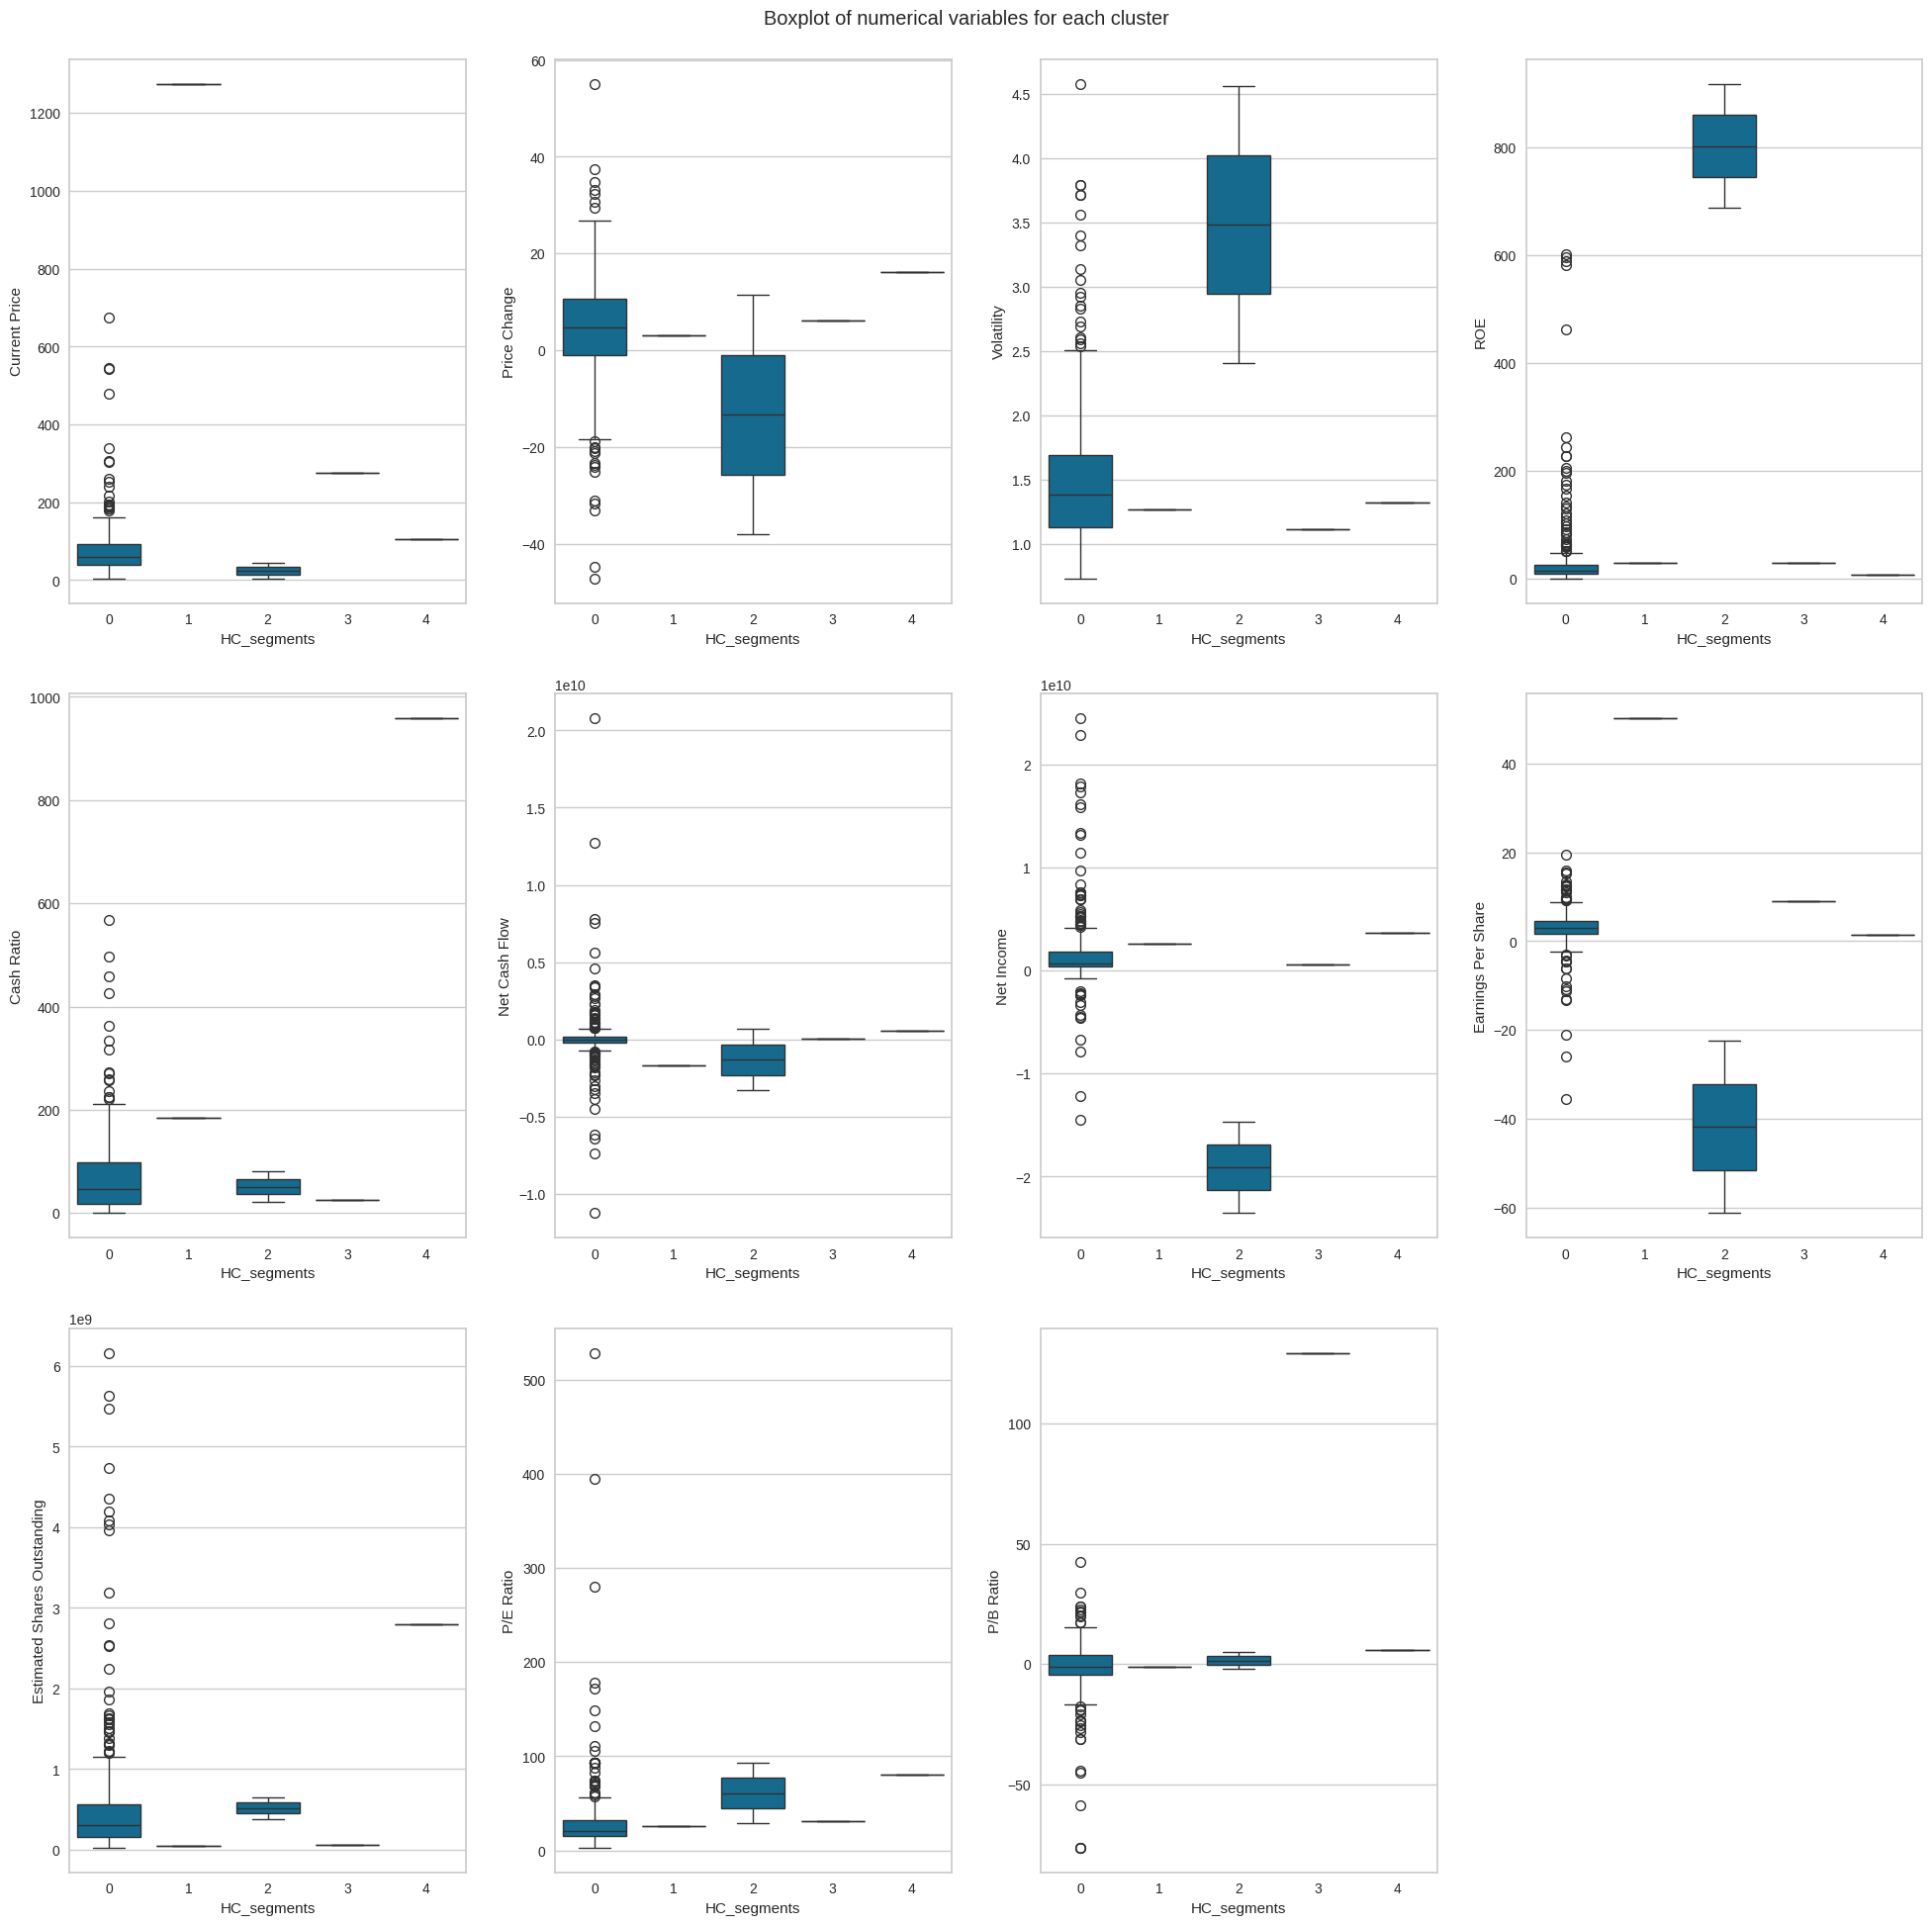

In [99]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)


**Observations** :

1. **Cluster 0 (Largest Group - 335 companies)**:  
   - Contains the majority of the companies across multiple sectors.  
   - Moderate values across most financial metrics, with a wide range of *Price Change*, *Volatility*, and *P/E Ratio*.  
   - Shows stable performance with consistent earnings and cash flow.  

2. **Cluster 1 (1 company - Priceline.com Inc.)**:  
   - Extremely high *Current Price* (~1274) compared to other clusters.  
   - High *Cash Ratio* (184) indicates strong liquidity.  
   - Negative *Net Cash Flow*, suggesting substantial cash outflows despite profitability.  
   - Very high *Earnings Per Share (EPS)* and *Estimated Shares Outstanding*, indicating a large and profitable company.  

3. **Cluster 2 (2 companies - Apache Corporation & Chesapeake Energy)**:  
   - Both companies are from the **Energy** sector.  
   - Extremely high *ROE* (~802%), reflecting a leveraged or highly profitable operation.  
   - High volatility (~3.48), suggesting significant price fluctuations.  
   - Negative *Net Income* and *Earnings Per Share*, indicating financial distress or recent losses.  

4. **Cluster 3 (1 company - Alliance Data Systems)**:  
   - Moderate *Current Price* (~276) and relatively low *Volatility*.  
   - Stable *Net Income* and positive cash flows.  
   - Extremely high *P/B Ratio* (129), suggesting the market values this company significantly above its book value.  

5. **Cluster 4 (1 company - Facebook)**:  
   - High *Current Price* (~104.66) with the highest *Cash Ratio* (958), reflecting an enormous cash reserve.  
   - Massive *Estimated Shares Outstanding* (~2.8 billion).  
   - Highest *P/E Ratio* (~79.89), suggesting strong market confidence and future growth expectations.  

### General Insights:
- **Cluster 0** represents the core, diversified companies with stable and moderate financial profiles.  
- **Clusters 1, 3, and 4** represent **outliers or unique profiles**, with distinct financial characteristics (e.g., high price, exceptional cash reserves, or market premiums).  
- **Cluster 2** includes **distressed energy firms** with negative earnings and high volatility.  
- **K=5 clustering** effectively separates regular performers, outliers, and financially troubled firms.

### **Comparison of K-means (K=8) vs Hierarchical Clustering (K=5)**

1. **Number of Clusters**:
   - K-means: 8 clusters (finer segmentation).
   - Hierarchical: 5 clusters (broader grouping).

2. **Cluster Sizes**:
   - K-means tends to generate more evenly distributed clusters due to its algorithmic nature.
   - Hierarchical clustering resulted in some clusters having very few companies (e.g., cluster 1, 2, 3, and 4 having 1-2 companies each), while cluster 0 is significantly larger.

3. **Company Allocation**:
   - Most companies from Hierarchical cluster 0 are spread across multiple K-means clusters, indicating more granular separation.
   - Outliers (e.g., Facebook, Alliance Data Systems, Priceline) formed independent clusters in Hierarchical, while K-means incorporated them into larger groups.

4. **Variable Distribution**:
   - **Price**: Hierarchical clusters show more extreme values (e.g., cluster 1 with a very high price). K-means provides more balanced price ranges across clusters.
   - **Volatility**: Hierarchical cluster 2 exhibits the highest volatility (Apache and Chesapeake), whereas K-means captures volatility in a more distributed fashion.
   - **ROE (Return on Equity)**: Hierarchical cluster 2 also shows extreme ROE values, while K-means distributes these anomalies across multiple clusters.
   - **Cash Ratio**: Hierarchical cluster 4 stands out with an exceptionally high cash ratio, while K-means smooths such extremes by spreading them across clusters.
   
5. **Outliers and Extreme Values**:
   - Hierarchical clustering isolates companies with unique characteristics (e.g., Facebook and Priceline), while K-means integrates them into broader groups.
   - K-means handles outliers less distinctly but offers more detailed differentiation within mainstream clusters.

6. **Interpretability**:
   - Hierarchical clustering is easier to interpret for identifying clear anomalies or special cases.
   - K-means provides better segmentation for general patterns across the dataset.

7. **Performance Considerations**:
   - K-means is computationally faster on large datasets.
   - Hierarchical clustering is more resource-intensive but gives a visual dendrogram, aiding in cluster validation.

### **Overall Insight**:
- Use **K-means** for more balanced, refined clusters and better performance on large datasets.
- Use **Hierarchical clustering**  to capture **outliers** and **distinct categories** more clearly.

###  **Actionable Insights & Recommendations**  

### 1. **Cluster-Specific Strategies**
   - **High-Performance Companies (Hierarchical Cluster 4 & K-means Cluster 7)**  
     - **Insight:** These companies exhibit exceptionally high cash ratios, strong ROE, and positive earnings per share.  
     - **Recommendation:**  
       - Prioritize **investment** and **strategic partnerships** with these firms due to their **financial stability**.  
       - Explore **growth opportunities** or **M&A** deals to leverage their cash reserves for expansion.

   - **Volatile & High-Risk Companies (Hierarchical Cluster 2 & K-means Cluster 4)**  
     - **Insight:** Characterized by **high volatility** and **negative earnings**, indicating operational or market risks.  
     - **Recommendation:**  
       - Implement **risk mitigation** strategies and **diversify investments** to reduce exposure.  
       - Engage in **cost optimization** and **debt restructuring** for financial stabilization.  
       - Monitor these companies closely and offer **tailored financial solutions** like hedging or risk management.

   - **Steady & Moderate Performers (Hierarchical Cluster 0 & K-means Cluster 2, 3, 5)**  
     - **Insight:** Companies in these clusters exhibit **moderate growth** and **stable cash flow** but lack aggressive expansion.  
     - **Recommendation:**  
       - Focus on **operational efficiency** and **incremental innovation**.  
       - Recommend **market penetration** strategies and targeted **marketing campaigns** to increase market share.  
       - Encourage adopting **technology** to enhance productivity.

   - **Outliers & Unique Cases (Hierarchical Cluster 1 & K-means Cluster 6)**  
     - **Insight:** Companies like **Facebook** and **Priceline** exhibit **unique financial patterns** (high revenue, high volatility).  
     - **Recommendation:**  
       - Design **customized financial solutions** such as bespoke credit lines or specialized investment instruments.  
       - Explore **strategic alliances** to leverage their unique market position and drive innovation.  
       - Consider **long-term partnerships** to benefit from their sustained market dominance.

---

### 2. **Investment Recommendations**
   - **High-Cash & High-ROE Firms:** Prioritize these companies for **long-term investments** and **dividends**.  
   - **Volatile & Loss-Making Firms:** Approach with **caution**—evaluate potential for **turnaround** or **restructuring**.  
   - **Stable Performers:** Ideal for **steady returns** and **low-risk portfolios**—focus on improving operational efficiency.  

---

### 3. **Operational Improvements**
   - **Cost Control:** Implement **aggressive cost-reduction** programs in **high-volatility** firms.  
   - **Liquidity Management:** Ensure **efficient cash utilization** for cash-rich companies by exploring **growth investments**.  
   - **Risk Management:** Strengthen **financial hedging** and **risk forecasting** to manage uncertainty.

---

### 4. **Future Analysis**
   - Perform **regular cluster reviews** to track shifting patterns and emerging trends.  
   - Use **advanced clustering methods** (e.g., DBSCAN) to identify **hidden anomalies** and **micro-segments**.  
   - Conduct a **year-over-year analysis** to observe performance evolution and adjust strategies accordingly.



In [101]:
!jupyter nbconvert --to html TrainAhead.ipynb

[NbConvertApp] Converting notebook TrainAhead.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 29 image(s).
[NbConvertApp] Writing 4131524 bytes to TrainAhead.html
